Prédiction de la note des films IMDB par les ’algorithmes de régression linéaire,GLM, Réseaux de neurones et random forest en Sickit-learn. L’échantillon de base est composé de 84429 films et 20 variables



In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#libs pour la modélisation
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from sklearn.linear_model import LinearRegression

#importer les données dans un df

imdb=pd.read_csv("./.../")
imdb.head(2)

,Titre,Date parution,Genre,Durée,Pays,Langue,Réalisateur,Auteur,Producteur,Acteurs,Note,Votes,Note hommes,Votes hommes,Note femmes,Votes femmes,Note USA,Votes USA,Note hors USA,Votes hors USA
0,Miss Jerry,1894-10-09,Romance,45.0,USA,NaN,Alexander Black,Alexander Black,Alexander Black Photoplays,"Blanche Bayliss, William Courtenay, Chauncey D...",5.9,154.0,6.2,97.0,6.0,35.0,6.4,51.0,6.0,70.0
1,The Story of the Kelly Gang,1906-12-26,Biography,70.0,Australia,NaN,Charles Tait,Charles Tait,J. and N. Tait,"Elizabeth Tait, John Tait, Norman Campbell, Be...",6.1,589.0,6.1,425.0,6.2,50.0,6.0,96.0,6.2,331.0


In [4]:
#renommer les colonnes ayant un espace dans le nom, remplacer l'espace par underscore.
imdb=imdb.rename(columns= {"Date parution":"Date_parution",
                         
                          "Note hommes":"Note_hommes",  
                          
                          "Votes hommes":"Votes_hommes", 
                         
                          "Note femmes":"Note_femmes",
                         
                          "Votes femmes":"Votes_femmes", 
                         
                          "Note USA":"Note_USA",	
                         
                         "Votes USA":"Votes_USA",
                         
                         "Note hors USA":"Note_hors_USA",
                         
                         "Votes hors USA":"Votes_hors_USA"
                         
                        }
                )

imdb.head(1)

,Titre,Date_parution,Genre,Durée,Pays,Langue,Réalisateur,Auteur,Producteur,Acteurs,Note,Votes,Note_hommes,Votes_hommes,Note_femmes,Votes_femmes,Note_USA,Votes_USA,Note_hors_USA,Votes_hors_USA
0,Miss Jerry,1894-10-09,Romance,45.0,USA,NaN,Alexander Black,Alexander Black,Alexander Black Photoplays,"Blanche Bayliss, William Courtenay, Chauncey D...",5.9,154.0,6.2,97.0,6.0,35.0,6.4,51.0,6.0,70.0


In [5]:
imdb.shape

(84429, 20)

In [6]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84429 entries, 0 to 84428
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Titre           84429 non-null  object 
 1   Date_parution   84429 non-null  object 
 2   Genre           83503 non-null  object 
 3   Durée           83725 non-null  float64
 4   Pays            84368 non-null  object 
 5   Langue          83525 non-null  object 
 6   Réalisateur     84346 non-null  object 
 7   Auteur          82901 non-null  object 
 8   Producteur      80057 non-null  object 
 9   Acteurs         84360 non-null  object 
 10  Note            84429 non-null  float64
 11  Votes           84429 non-null  float64
 12  Note_hommes     84429 non-null  float64
 13  Votes_hommes    84429 non-null  float64
 14  Note_femmes     84429 non-null  float64
 15  Votes_femmes    84429 non-null  float64
 16  Note_USA        84429 non-null  float64
 17  Votes_USA       84429 non-null 

In [7]:
#statistiques descriptives des variables quantitatives(numériques)
imdb.describe().T.round(4)

,count,mean,std,min,25%,50%,75%,max
Durée,83725.0,100.3283,22.5535,41.0,88.0,96.0,108.0,808.0
Note,84429.0,5.9002,1.2332,1.0,5.2,6.1,6.8,9.9
Votes,84429.0,9602.6633,53953.4175,99.0,206.0,488.0,1789.0,2278845.0
Note_hommes,84429.0,5.8194,1.2466,1.0,5.1,6.0,6.7,10.0
Votes_hommes,84429.0,6097.7746,33880.9729,4.0,133.0,311.0,1156.0,1409165.0
Note_femmes,84429.0,6.0406,1.3441,1.0,5.3,6.3,7.0,10.0
Votes_femmes,84429.0,1381.3251,7724.5016,1.0,22.0,58.0,229.0,278964.0
Note_USA,84429.0,5.9259,1.3073,1.0,5.2,6.1,6.8,10.0
Votes_USA,84429.0,1661.6065,8499.0273,1.0,24.0,81.0,338.0,348363.0
Note_hors_USA,84429.0,5.7517,1.2835,1.0,5.0,6.0,6.7,10.0



imdb[["Votes_hommes","Votes","Votes_femmes","Votes_USA","Votes_hors_USA"]].hist(bins=50,figsize=(12, 8))

plt.show()

In [9]:
#vérifier l'asymétrie des variables quantitatives 
imdb.skew(numeric_only=True)



Durée              3.110097
Note              -0.759096
Votes             14.535947
Note_hommes       -0.738390
Votes_hommes      14.072383
Note_femmes       -0.788597
Votes_femmes      12.964197
Note_USA          -0.630461
Votes_USA         13.029502
Note_hors_USA     -0.776940
Votes_hors_USA    12.890992
dtype: float64

In [10]:
#vérifier l'applatissement des courbe des  variables quantitatives 
imdb.kurt(numeric_only=True)



Durée              41.107392
Note                0.583287
Votes             321.326226
Note_hommes         0.453812
Votes_hommes      300.181416
Note_femmes         0.892303
Votes_femmes      242.456576
Note_USA            0.618598
Votes_USA         261.104181
Note_hors_USA       0.526976
Votes_hors_USA    247.586044
dtype: float64

In [11]:
(np.log(imdb["Votes"])).skew()

1.2825312106731201

In [12]:
((imdb["Votes"])**(1/10)).skew()

1.7998327218062293

In [13]:
(imdb[["Votes","Votes_hommes","Votes_femmes","Votes_USA","Votes_hors_USA"]]).skew()

Votes             14.535947
Votes_hommes      14.072383
Votes_femmes      12.964197
Votes_USA         13.029502
Votes_hors_USA    12.890992
dtype: float64

In [14]:
# tranformation en log ln pour réduire le skew, les votes ne sont pas négatifs et tous supérieurs ou égal à 1
logvotes=np.log(imdb[["Votes","Votes_hommes","Votes_femmes","Votes_USA","Votes_hors_USA"]])
logvotes.skew()

Votes             1.282531
Votes_hommes      1.248571
Votes_femmes      0.985459
Votes_USA         0.661720
Votes_hors_USA    1.098760
dtype: float64

In [15]:
#statistiques descriptives des variables qualitatives catégorielles

imdb.describe(include=object).T

,count,unique,top,freq
Titre,84429,80779,Anna,10
Date_parution,84429,21881,2010,111
Genre,83503,22,Drama,24615
Pays,84368,160,USA,30572
Langue,83525,163,English,42303
Réalisateur,84346,31869,Michael Curtiz,92
Auteur,82901,43114,Jing Wong,91
Producteur,80057,31669,Metro-Goldwyn-Mayer (MGM),1270
Acteurs,84360,84304,"Nobuyo Ôyama, Noriko Ohara, Michiko Nomura, Ka...",9


***Verification des valeurs manquantes***

In [17]:
imdb.isna().sum()

Titre                0
Date_parution        0
Genre              926
Durée              704
Pays                61
Langue             904
Réalisateur         83
Auteur            1528
Producteur        4372
Acteurs             69
Note                 0
Votes                0
Note_hommes          0
Votes_hommes         0
Note_femmes          0
Votes_femmes         0
Note_USA             0
Votes_USA            0
Note_hors_USA        0
Votes_hors_USA       0
dtype: int64

In [18]:
pd.DataFrame(imdb.isna().sum()).sort_values(0,ascending = False).T

,Producteur,Auteur,Genre,Langue,Durée,Réalisateur,Acteurs,Pays,Titre,Note_femmes,Note_hors_USA,Votes_USA,Note_USA,Votes_femmes,Note,Votes_hommes,Note_hommes,Votes,Date_parution,Votes_hors_USA
0,4372,1528,926,904,704,83,69,61,0,0,0,0,0,0,0,0,0,0,0,0


In [19]:

#calculer la proportion  des valeurs manquantes en pourcentage,par rapport au total de données disponible pour chaque columns de l'échantillon.
(imdb.isna().mean()*100).round(3)

Titre             0.000
Date_parution     0.000
Genre             1.097
Durée             0.834
Pays              0.072
Langue            1.071
Réalisateur       0.098
Auteur            1.810
Producteur        5.178
Acteurs           0.082
Note              0.000
Votes             0.000
Note_hommes       0.000
Votes_hommes      0.000
Note_femmes       0.000
Votes_femmes      0.000
Note_USA          0.000
Votes_USA         0.000
Note_hors_USA     0.000
Votes_hors_USA    0.000
dtype: float64

In [20]:
#afficher les lignes dupliquées
imdb[imdb.duplicated()]

,Titre,Date_parution,Genre,Durée,Pays,Langue,Réalisateur,Auteur,Producteur,Acteurs,Note,Votes,Note_hommes,Votes_hommes,Note_femmes,Votes_femmes,Note_USA,Votes_USA,Note_hors_USA,Votes_hors_USA


In [21]:
#les variable réalisateur, auteur , producteur et acteur contiennent beaucoup de valeurs uniques et certaines beaucoup de valeurs manquantes, 
#Toutes ces 4 variable ne seront pas considérés pour le modèle.

***Distribution de la variable Note dans l'échantillon***

Les notes de l'échantillon ne sont pas nulles et toutes positives entre 1 et 9.9 Distribution est asymétrique, négative (skew = -0.759096) étalée à gauche, concentration de valeurs extrêmes vers la note 2, plus que vers la droite vers les valeurs élevées. En cas d'utilisation des modèles de régression linéaire qui sont sensible à l'asymétrie, la transformation de la variable note en puissance carrée(note**2), permet de réduire la symétrie et l’effet des valeurs extrêmes.

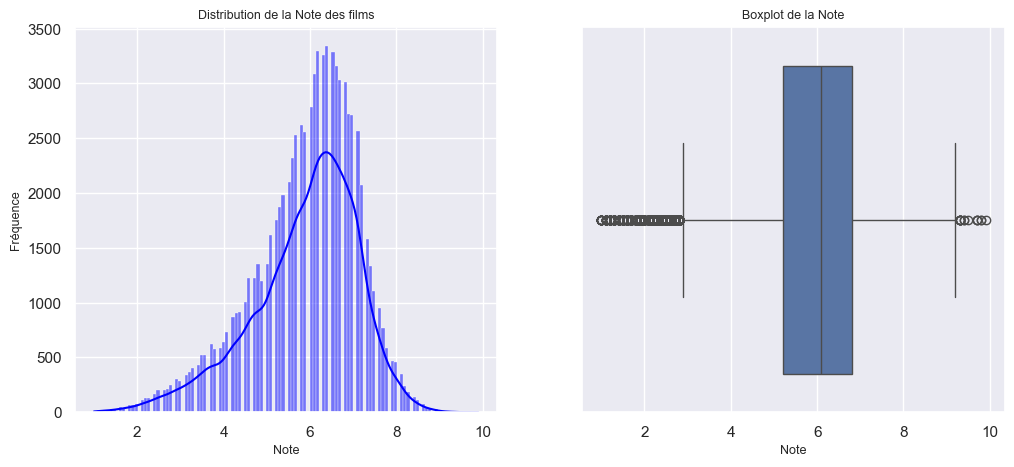

In [23]:
# Création de la figure et des axes
fig, ax = plt.subplots(1, 2, figsize = (12,5))
ax1 = ax[0]
ax2 = ax[1]


# Création des graphiques
sns.histplot(data=imdb["Note"],color = "blue", kde=True, ax = ax1)
sns.boxplot( x ="Note", data=imdb, ax = ax2)


# Modification des titres d'axes
taille_titre_axe = 14
ax1.set_xlabel("Note", fontsize = 9)
ax2.set_xlabel("Note", fontsize = 9)

ax1.set_ylabel("Fréquence", fontsize = 9)
#ax2.set_ylabel("Compte", fontsize = taille_titre_axe)


# Modification des titres de graphiques
taille_titre = 16
ax1.set_title("Distribution de la Note des films", fontsize = 9)
ax2.set_title("Boxplot de la Note", fontsize = 9);

In [24]:
#moyenne < médiane , skew négatif = -0.75 , asymétrie étalée à gauche, transformation en puissance peut réduire le skew
z=imdb["Note"]
(z**2-z).skew()

-0.05899352513678595

In [25]:
(z**2).skew()

-0.11779885032617615

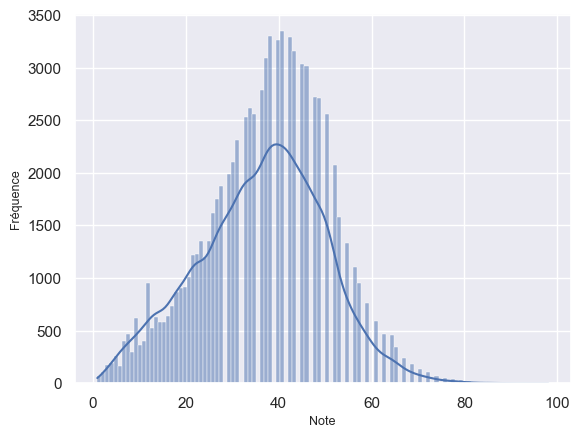

In [26]:
# possibilité de changement de variable pour la note pour réduire l'asymétrie, z= note**2
# distrubution de la nouvelle variable "note**2" pour réduire le skew et les valeurs extremes
fig, ax = plt.subplots()
sns.histplot(data=(imdb["Note"]**2),kde=True)
ax.set_xlabel("Note", fontsize = 9)
ax.set_ylabel("Fréquence", fontsize = 9);

#boxplot de la note**2( changement de variable note=note**2)
sns.boxplot( y =(imdb["Note"]**(2)), data=imdb)

#Distribution de la note selon le genre connu des utilisateurs et l'origine connue des votes
fig, ax = plt.subplots(figsize = (8,6))
imdb.boxplot(column=(['Note_hommes','Note_femmes','Note',"Note_USA","Note_hors_USA"]), ax=ax)

ax.set_title("Distribution de la note selon le genre connu des utilisateurs et l'origine connue des votes");


In [29]:
# calcul  des notes extrêmes ,par la méthode IRQ  d'un boxplot
#calcul des quantiles 1 et 3

q1=imdb["Note"].quantile(0.25)
q3=imdb["Note"].quantile(0.75)

#interquartile
iqr=q3-q1

#calcul des bornes inféreures et supérieures de la distribution, considérées comme les limites extrêmes par  la methode IRQ
borne_infer = q1 - 1.5*iqr
borne_sup = q3 + 1.5*iqr

#les valeurs extrêmes à gauche ( inférieure à la borne inférieure de la distribution)
valeur_infer = imdb[imdb["Note"]<borne_infer]


#les valeurs extrêmes à droite ( supérieures à la borne maximale de la distribution)
valeur_sup = imdb[imdb["Note"]>borne_sup]

#df sans les valeurs extrêmes
df_sans_ve= imdb[(imdb["Note"] > borne_infer) & (imdb["Note"] < borne_sup)]

print(len(valeur_infer))
print(borne_infer)
print(len(valeur_sup))
print(borne_sup)

1833
2.8000000000000007
16
9.2


### La variable Vote par film

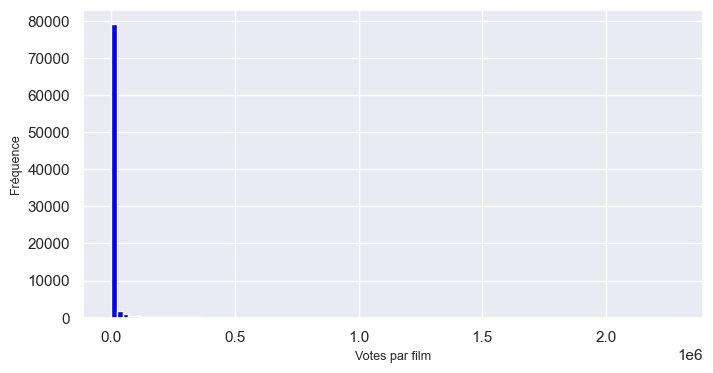

In [31]:
#Distribution des votes par film 

fig, ax = plt.subplots(figsize = (8,4))
imdb["Votes"].hist(color = "blue", bins=100)
ax.set_xlabel("Votes par film", fontsize = 9)
ax.set_ylabel("Fréquence", fontsize = 9);

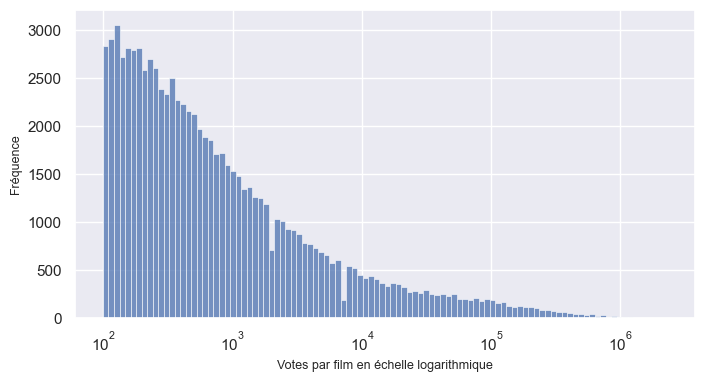

In [32]:


# distrubution de nombre de vote par film en échelle logarithmique pour mieux visualiser la forme de la distribution avec  les note extremes les moins  fréquentes
fig, ax = plt.subplots(figsize = (8,4))
#sns.histplot(data=imdb[["Votes_hommes","Votes","Votes_femmes","Votes_USA","Votes_hors_USA"]], log_scale=True)
sns.histplot(data=imdb["Votes"], log_scale=True)
ax.set_xlabel("Votes par film en échelle logarithmique", fontsize = 9)
ax.set_ylabel("Fréquence", fontsize = 9);

In [33]:

# la ditribution des Votes indique une  forte dispersion et une asymétrie de la distribution de nombre de vote par film , 

#afin de  visualiser la distribution de la note par différente tranche de  nombre de votes

#on crée 4 catégories de votes , représentants les 4 quartiles de la distribution des votes, en utilisant  la fonction .qcut(0), 


imdb["Votes_par_quartile"] = pd.qcut(imdb["Votes"], q=4) #labels=["Q1","Q2", "Q3","Q4"]

#Calcul de la note moyenne par classe de votes

note_par_quartile=imdb.groupby("Votes_par_quartile")["Note"].agg(["mean","count","median","std","min","max","skew"])
note_par_quartile

C:\Users\monpc\AppData\Local\Temp\ipykernel_7216\717143246.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  note_par_quartile=imdb.groupby("Votes_par_quartile")["Note"].agg(["mean","count","median","std","min","max","skew"])


,mean,count,median,std,min,max,skew
Votes_par_quartile,,,,,,,
"(98.999, 206.0]",5.585754,21185,5.8,1.190504,1.0,9.8,-0.772435
"(206.0, 488.0]",5.660671,21038,5.9,1.243138,1.0,9.7,-0.766667
"(488.0, 1789.0]",5.920144,21103,6.2,1.225928,1.0,9.9,-0.778183
"(1789.0, 2278845.0]",6.434834,21103,6.6,1.084392,1.0,9.4,-0.878614


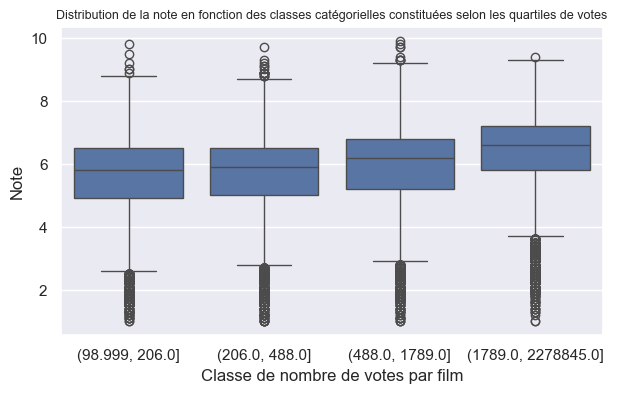

In [34]:

#Distribution de la note en fonction de la  catégorie  de votes, les classes catégorielles constituées selon les quartiles de votes 
fig, ax = plt.subplots(figsize = (7,4))
sns.boxplot( y=imdb["Note"], x=imdb["Votes_par_quartile"])
ax.set_xlabel("Classe de nombre de votes par film")
ax.set_title("Distribution de la note en fonction des classes catégorielles constituées selon les quartiles de votes",fontsize = 9);

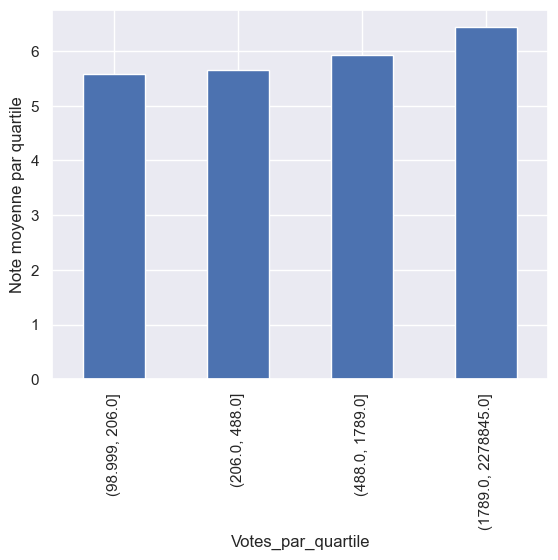

In [35]:
#Distribution de la note moyenne par quartile de votes
fig,ax = plt.subplots()
note_par_quartile["mean"].plot.bar(ax =ax)
ax.set_ylabel("Note moyenne par quartile");

<Axes: xlabel='Votes', ylabel='Note'>

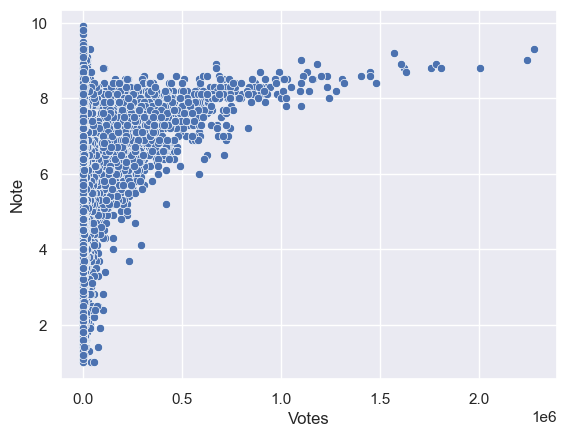

In [36]:
#Ditribution de la note en fonctioon de nombre de votes par film
sns.scatterplot(x = "Votes", y = "Note", data = imdb)

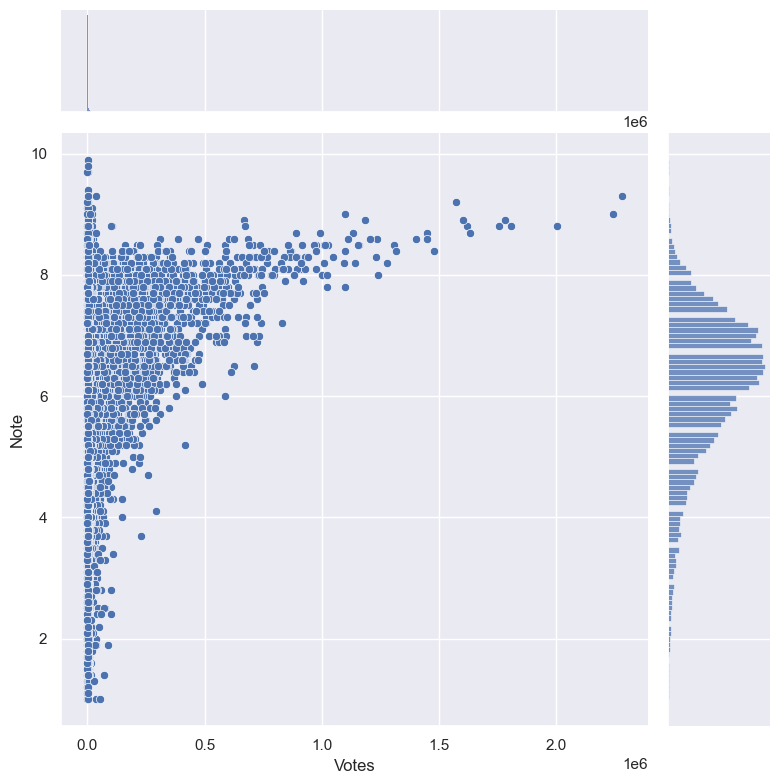

In [37]:
#ditribution de la note des films ayant reçu plus de 500 votes (488  est le vote médiane de l'échantillon)

sns.jointplot(data = imdb[imdb["Votes"]>500], x = "Votes", y = "Note", height = 8);

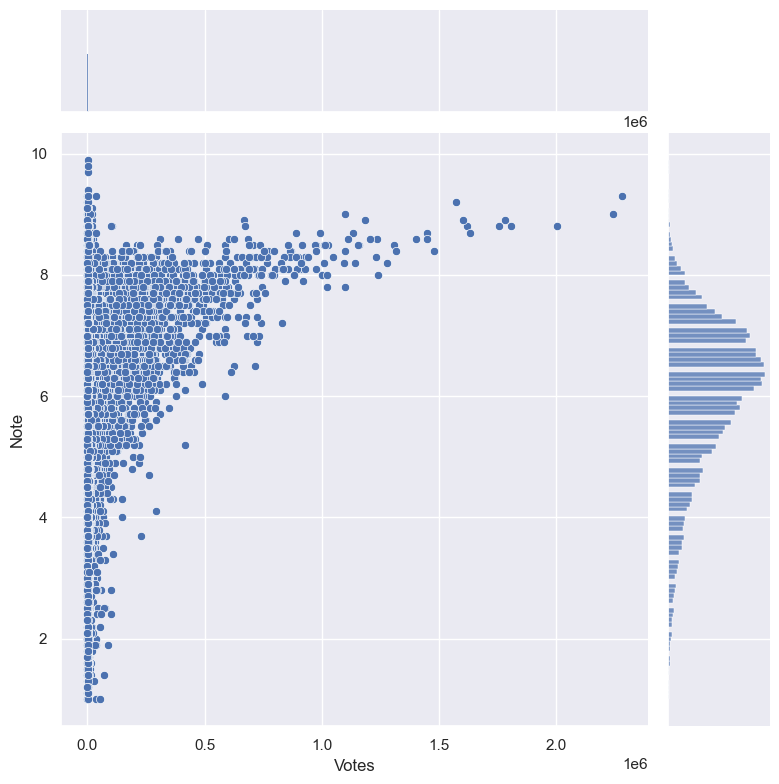

In [38]:
#ditribution de la note des films ayant reçu plus de 500 votes (488  est le vote médiane de l'échantillon)

sns.jointplot(data = imdb[imdb["Votes"]>200], x = "Votes", y = "Note", height = 8);

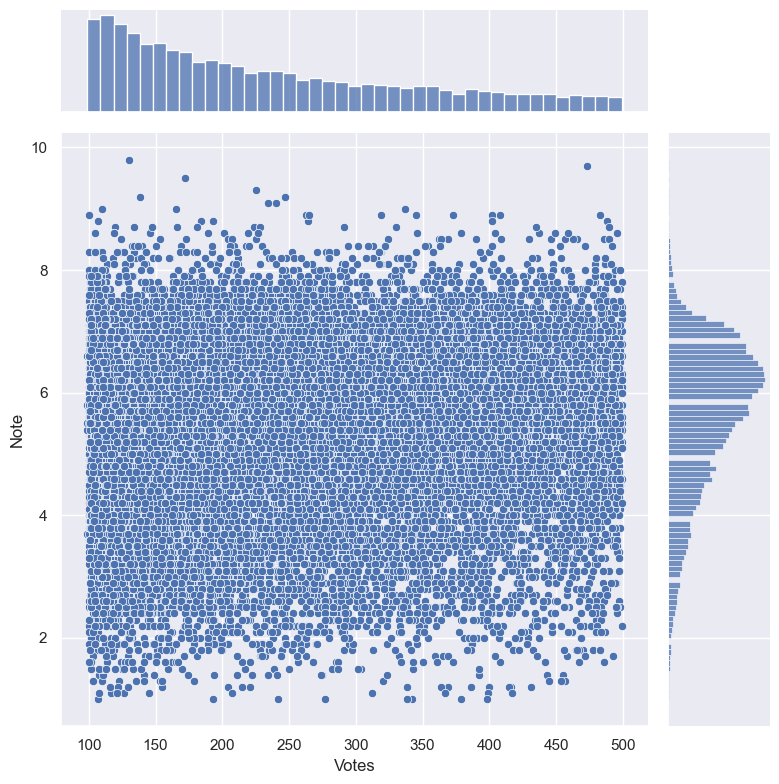

In [39]:

#ditribution de la note des films ayant reçu moins de  votes 500 .
sns.jointplot(data = imdb[imdb["Votes"]<500], x = "Votes", y = "Note", height = 8);

***Variable Genre***

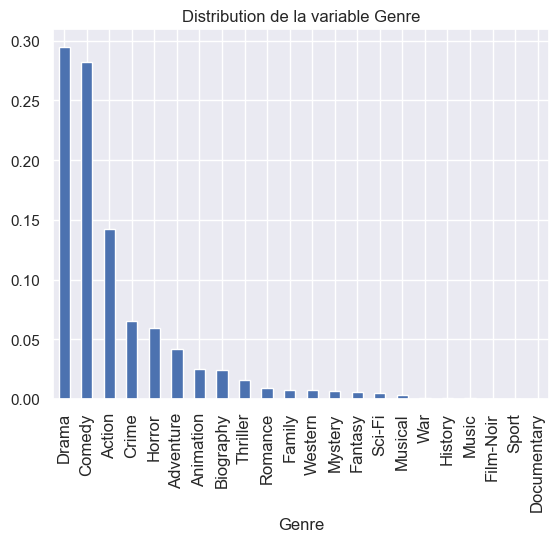

In [41]:
# Faites un graphique de la proportion des occurrences de chaque valeur unique de la colonne Genre
fig, ax = plt.subplots()
imdb["Genre"].value_counts(normalize = True).plot(ax = ax, kind = "bar")
ax.set_title("Distribution de la variable Genre")
ax.tick_params(axis = "x", which = "major", labelsize = 12, rotation = 90);

C:\Users\monpc\AppData\Local\Temp\ipykernel_7216\3756463843.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90);


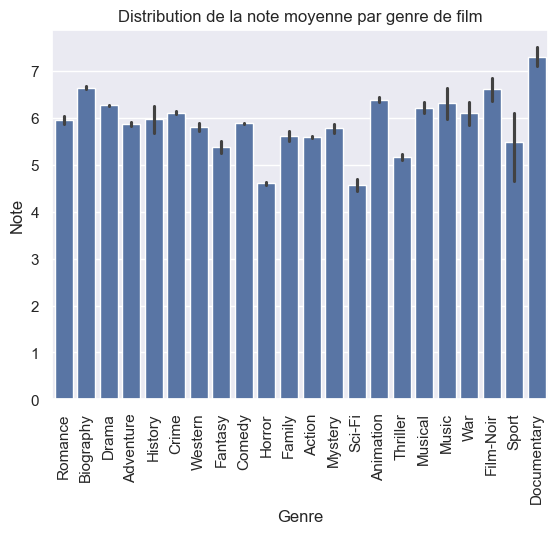

In [42]:
fig, ax = plt.subplots()
sns.barplot(x = "Genre", y = "Note", data = imdb, ax=ax)
ax.set_title("Distribution de la note moyenne par genre de film")

ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

In [43]:
imdb.groupby("Genre")["Note"].mean().sort_values(ascending = False)

Genre
Documentary    7.300000
Biography      6.641695
Film-Noir      6.603448
Animation      6.387258
Music          6.306579
Drama          6.269515
Musical        6.216987
Crime          6.105246
War            6.094059
History        5.967532
Romance        5.957760
Comedy         5.880064
Adventure      5.867321
Western        5.802815
Mystery        5.772021
Family         5.607967
Action         5.585039
Sport          5.475000
Fantasy        5.378776
Thriller       5.166542
Horror         4.606084
Sci-Fi         4.557246
Name: Note, dtype: float64

In [44]:
imdb.groupby("Genre")["Note"].mean().sort_values(ascending = False).index[:6]

Index(['Documentary', 'Biography', 'Film-Noir', 'Animation', 'Music', 'Drama'], dtype='object', name='Genre')

In [45]:
imdb.groupby("Genre")["Note"].mean().sort_values(ascending = False).index[-6:]

Index(['Action', 'Sport', 'Fantasy', 'Thriller', 'Horror', 'Sci-Fi'], dtype='object', name='Genre')

C:\Users\monpc\AppData\Local\Temp\ipykernel_7216\2655404708.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90);


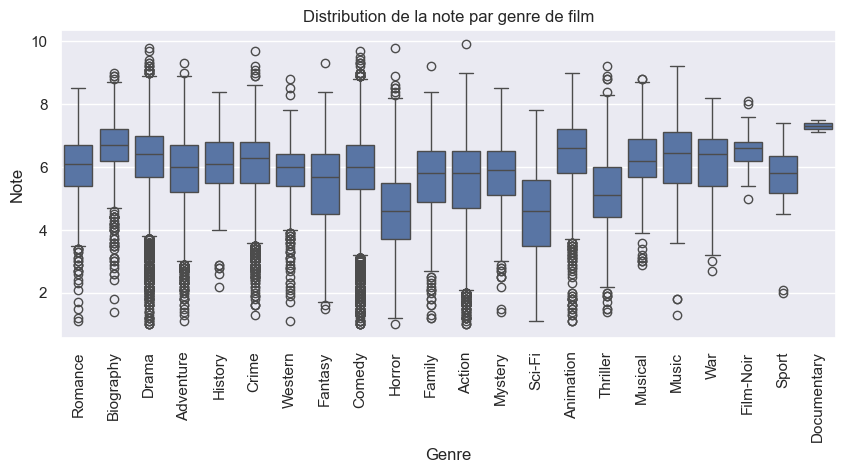

In [46]:
fig, ax = plt.subplots(figsize = (10,4))
sns.boxplot(x = "Genre", y = "Note", data = imdb, ax=ax)
ax.set_title("Distribution de la note par genre de film")

ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

C:\Users\monpc\AppData\Local\Temp\ipykernel_7216\2541587802.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot1.set_xticklabels(plot1.get_xticklabels(), rotation=90);


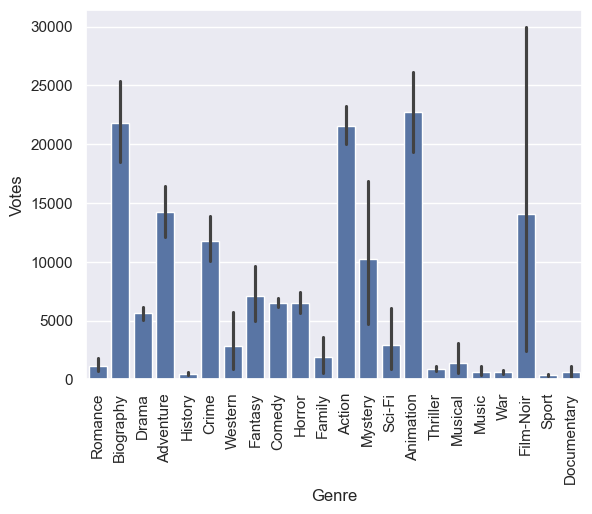

In [47]:
# nombre de votes par genre du film
plot1=sns.barplot(x = "Genre", y = "Votes", data = imdb)

plot1.set_xticklabels(plot1.get_xticklabels(), rotation=90);

In [48]:
(imdb["Genre"].value_counts()/imdb["Genre"].count())[:10]

Genre
Drama        0.294780
Comedy       0.282577
Action       0.142079
Crime        0.065064
Horror       0.059842
Adventure    0.042106
Animation    0.024718
Biography    0.024299
Thriller     0.015963
Romance      0.008874
Name: count, dtype: float64

In [49]:
imdb["Genre"].value_counts()

Genre
Drama          24615
Comedy         23596
Action         11864
Crime           5433
Horror          4997
Adventure       3516
Animation       2064
Biography       2029
Thriller        1333
Romance          741
Family           615
Western          604
Mystery          579
Fantasy          490
Sci-Fi           414
Musical          312
War              101
History           77
Music             76
Film-Noir         29
Sport             16
Documentary        2
Name: count, dtype: int64

In [50]:
#Transformation de la variable Genre en variable Genre_groupé, en regroupant les deux catégorie sport et documentary dans nouvelle catégorie "Autres_Genre
# focntion pour créer la nouvelle variable qui sera utilisée dans le modèle

def genre_film (genre):
    liste=['Sport', 'Documentary']
    
    if pd.isna(genre):
        genres = np.nan

    elif genre in liste:
        genres= "Autres_Genre"
        
    else:
        genres=genre
        
    return genres


imdb["Genre_groupé"]=imdb["Genre"].apply(genre_film)

In [51]:
imdb["Genre_groupé"].value_counts()

Genre_groupé
Drama           24615
Comedy          23596
Action          11864
Crime            5433
Horror           4997
Adventure        3516
Animation        2064
Biography        2029
Thriller         1333
Romance           741
Family            615
Western           604
Mystery           579
Fantasy           490
Sci-Fi            414
Musical           312
War               101
History            77
Music              76
Film-Noir          29
Autres_Genre       18
Name: count, dtype: int64

### Variable Durée

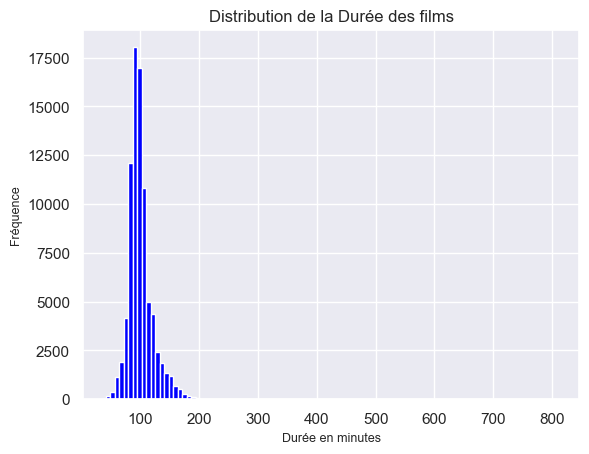

In [53]:
# distrubution de nombre de vote par film dans l'échantillon
fig, ax = plt.subplots()
imdb["Durée"].hist(color = "blue", bins=100)
ax.set_xlabel("Durée en minutes", fontsize = 9)
ax.set_ylabel("Fréquence", fontsize = 9)
ax.set_title("Distribution de la Durée des films");

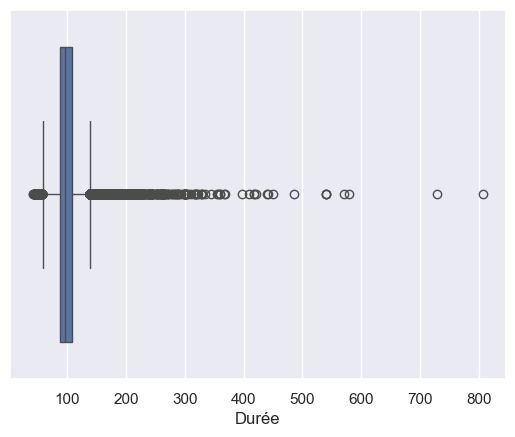

In [54]:
#boxplot de la durée
sns.boxplot( x = "Durée", data=imdb);

In [55]:
# la ditribution des Votes indique une  forte dispersion et une asymétrie de la distribution de nombre de vote par film , 

#afin de  visualiser la distribution de la note par différente tranche de  nombre de votes

#on crée 4 catégories de votes , représentants les 4 quartiles de la distribution des votes, en utilisant  la fonction .qcut(0), 


imdb["Durée_par_quartile"] = pd.qcut(imdb["Durée"], q=4) #labels=["Q1","Q2", "Q3","Q4"]

#Calcul de la note moyenne par classe de votes

durée_par_quartile=imdb.groupby("Durée_par_quartile")["Note"].agg(["mean","count","median","std","min","max","skew"])
print("Distribution de la note par quartile de la durée")
durée_par_quartile

C:\Users\monpc\AppData\Local\Temp\ipykernel_7216\3424373981.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  durée_par_quartile=imdb.groupby("Durée_par_quartile")["Note"].agg(["mean","count","median","std","min","max","skew"])


Distribution de la note par quartile de la durée


,mean,count,median,std,min,max,skew
Durée_par_quartile,,,,,,,
"(40.999, 88.0]",5.557521,22018,5.8,1.298428,1.0,9.7,-0.684657
"(88.0, 96.0]",5.622388,21083,5.8,1.212466,1.0,9.7,-0.602994
"(96.0, 108.0]",6.013494,19965,6.2,1.073984,1.0,9.3,-0.880884
"(108.0, 808.0]",6.440505,20659,6.6,1.115288,1.0,9.9,-1.013846


<Axes: xlabel='Durée_par_quartile', ylabel='Note'>

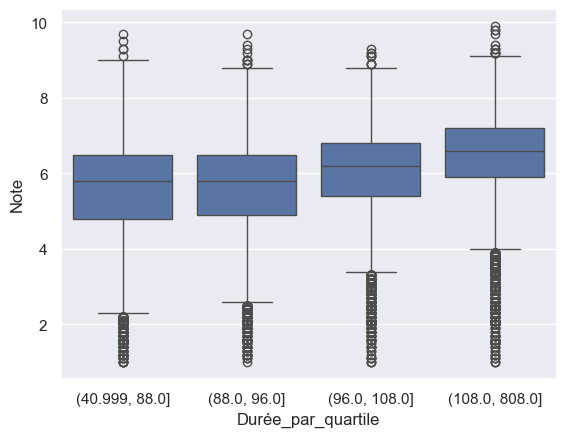

In [56]:
sns.boxplot(x=imdb["Durée_par_quartile"],y="Note",data = imdb)

<Axes: xlabel='Durée', ylabel='Note'>

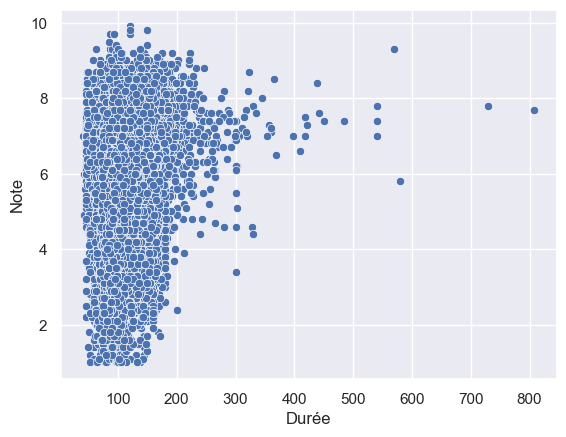

In [57]:
# DISTRIBUTION DE LA NOTE EN FOCNTION DE LA DURÉE
sns.scatterplot(x = "Durée", y = "Note", data = imdb)

### Variable Pays

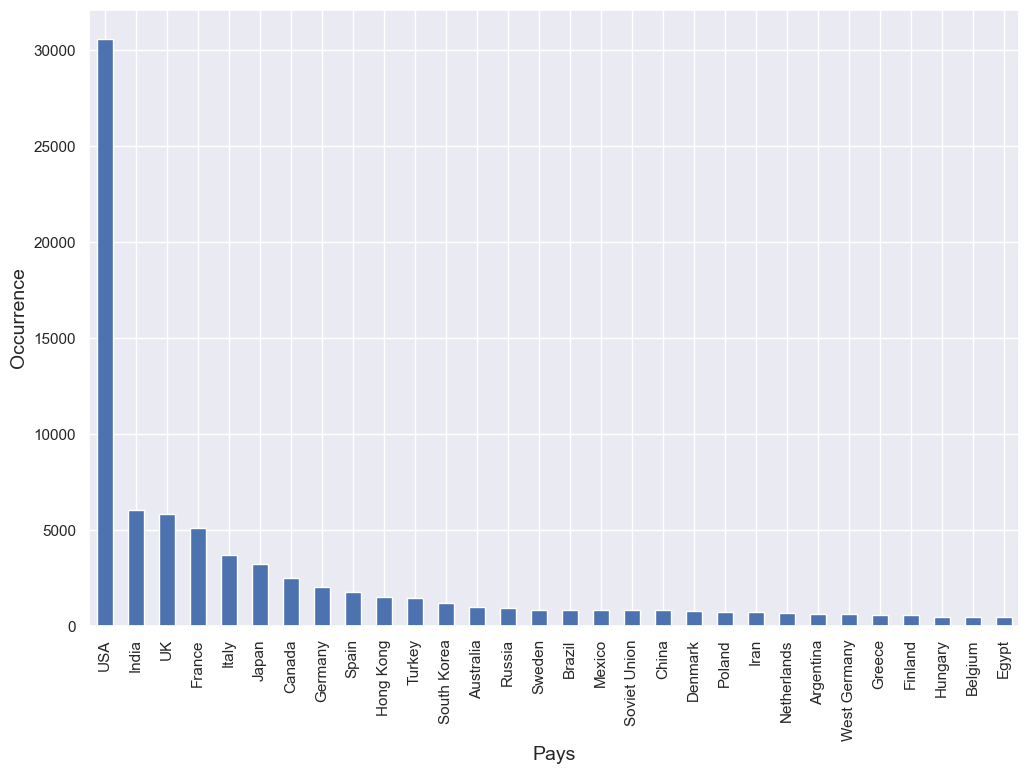

In [59]:
#Distribution des 30 premiers pays producteurs des films

fig,ax = plt.subplots(figsize=(12,8))
imdb["Pays"].value_counts()[:30].plot.bar(ax=ax)
ax.set_xlabel("Pays", fontsize=14)
ax.set_ylabel("Occurrence", fontsize=14);

Les USA est plus grand producteur de films et dépasse largement les autres pays, comme cette variable a plusieurs valeurs uniques et des catégories moins pertinent par rapport aux USA.
il convient de la transformer pour extraire l'information pertinente afin de simplifier le modèle.
On transforme la variable Pays en variable nominale, nommée ‘Origines, à 6 catégories qui représentent les 5 premiers pays producteurs  (USA, India, UK, Italy, France), et une catégorie International  qui regroupant les autres pays.



In [61]:
# création de la colonne Origines

def origine_film (pays):
    liste=["USA","India","UK","Italy","France"]
    if pd.isna(pays):
        origine = np.nan

    elif pays in liste:
        origine= pays
        
    else:
        origine="International"
        
    return origine


imdb["Origines"]=imdb["Pays"].apply(origine_film)

<Axes: xlabel='Origines', ylabel='Note'>

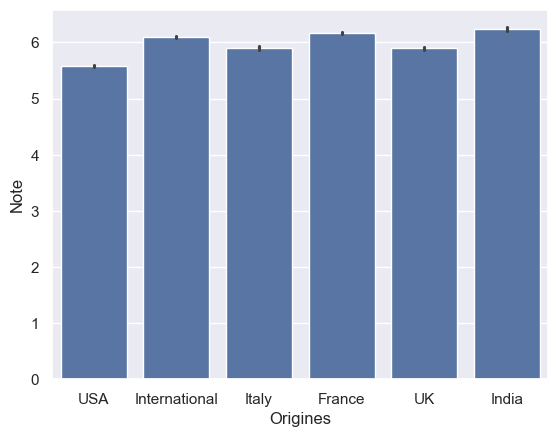

In [62]:

# Distribution de la note en focntion de la nouvelle variable  "Origines"  des films , et qui va etre utilisée dans le modèle,

sns.barplot(x = "Origines", y = "Note", data = imdb)

### Variable Langue

In [64]:
imdb["Langue"].value_counts()/imdb["Langue"].count()

Langue
English          0.506471
French           0.062640
Spanish          0.040048
Italian          0.038420
Japanese         0.037282
                   ...   
Tigrigna         0.000012
Haitian          0.000012
Cree             0.000012
Chechen          0.000012
Crimean Tatar    0.000012
Name: count, Length: 163, dtype: float64

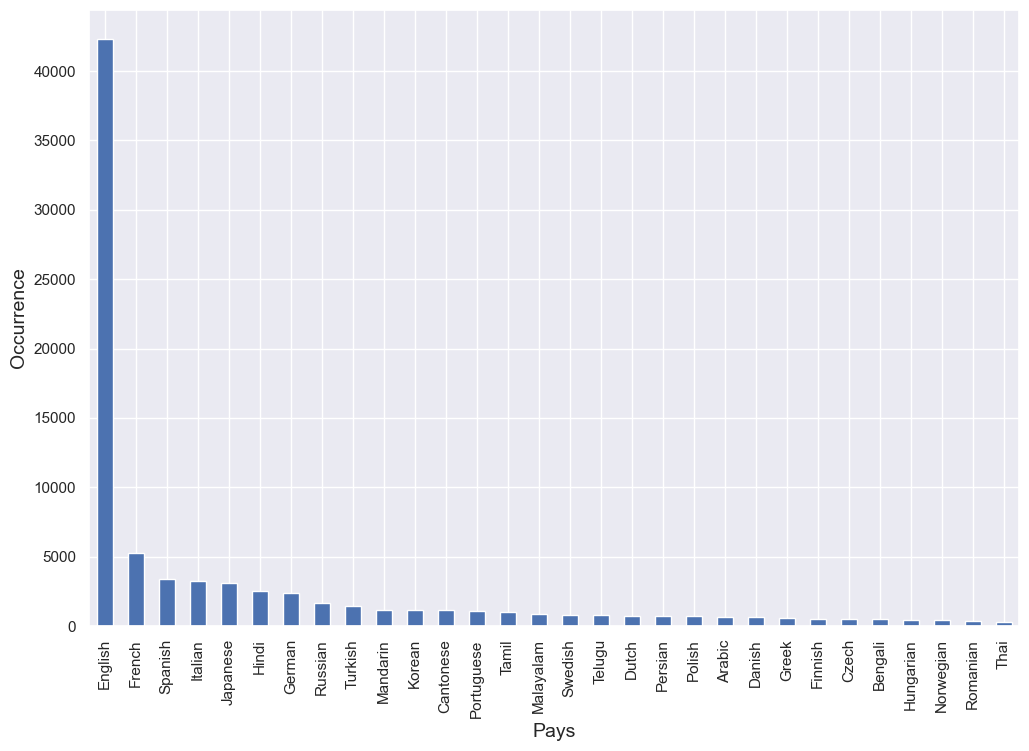

In [65]:
#Distribution des 30 premières langues des films

fig,ax = plt.subplots(figsize=(12,8))
imdb["Langue"].value_counts()[:30].plot.bar(ax=ax)
ax.set_xlabel("Pays", fontsize=14)
ax.set_ylabel("Occurrence", fontsize=14);

In [66]:
#L'anglais est la langue de la majorité des film de l’échantillon(proportion de 50.6%)  et  contient  beaucoup de  valeurs unique. 
#On transforme la variable langue en variable binaire exploitable par un modèle. La nouvelle variable est nommée "Langue_binaire" , 
#elle prend  la valeur 1 si la langue du film est l'anglais et 0 sinon. 
# la nouvelle colonne nommée "Langue_binaire" est créé par la fonction suivante et la méthode.apply 


def langue_film (langue):

    if pd.isna(langue):
        langue_b = np.nan

    elif langue== "English":
        langue_b=1
    else:
        langue_b=0
        
    return langue_b


imdb["Langue_binaire"]=imdb["Langue"].apply(langue_film)

imdb.head(2)

,Titre,Date_parution,Genre,Durée,Pays,Langue,Réalisateur,Auteur,Producteur,Acteurs,...,Votes_femmes,Note_USA,Votes_USA,Note_hors_USA,Votes_hors_USA,Votes_par_quartile,Genre_groupé,Durée_par_quartile,Origines,Langue_binaire
0,Miss Jerry,1894-10-09,Romance,45.0,USA,NaN,Alexander Black,Alexander Black,Alexander Black Photoplays,"Blanche Bayliss, William Courtenay, Chauncey D...",...,35.0,6.4,51.0,6.0,70.0,"(98.999, 206.0]",Romance,"(40.999, 88.0]",USA,NaN
1,The Story of the Kelly Gang,1906-12-26,Biography,70.0,Australia,NaN,Charles Tait,Charles Tait,J. and N. Tait,"Elizabeth Tait, John Tait, Norman Campbell, Be...",...,50.0,6.0,96.0,6.2,331.0,"(488.0, 1789.0]",Biography,"(40.999, 88.0]",International,NaN


In [ ]:

# Distribution de la note en fonction de la nouvelle variable  'Langue_binaire' qui va etre utilisée dans le modèle

sns.barplot(x = "Langue_binaire", y = "Note", data = imdb)

### Variable Date de Parution

In [101]:
# distribution de la variable Note des films par période de parution du film

#convertir la colonne date de parution en format date de python ,ensuite la reconvertir en int pour afficher uniquement l'année d'une nouvelle colonne"Année"
imdb["Année"] = pd.to_datetime(imdb["Date_parution"].str[:4]).dt.year



#Grouper les date de parution par décennie , et les grouper par la note moyenne et le nombre de votes moyenn
note_decennie=imdb.groupby((imdb["Année"]//10)*10)[["Note", "Votes","Durée"]].mean()
note_decennie.T


Année,1890,1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2010,2020
Note,5.9,6.1,6.286010,6.563492,6.352286,6.481968,6.414943,6.337913,6.124035,6.006832,5.889978,5.749086,5.667162,5.669736
Votes,154.0,589.0,765.699482,2227.895238,1328.644641,2713.378501,3216.766285,3685.871811,4679.275687,7545.462262,13099.136773,14899.042390,10646.780845,4359.877736
Durée,45.0,70.0,80.531250,88.405751,82.184639,89.387222,93.179063,99.572965,100.073488,101.441568,103.338102,102.527912,102.044482,101.647328


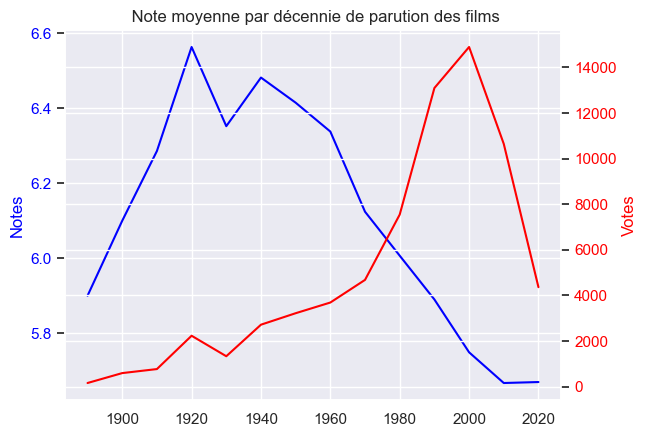

In [102]:
#Distribution de la note en fontion de la décennie  de parution  du film, et le nombre moyen de votes par film

fig, ax1 = plt.subplots()

#axe des notes moyenne par décennie en blue
ax1.set_ylabel("Notes", color = "blue", fontsize = 12)
ax1.plot(note_decennie.index,note_decennie["Note"], color = "blue")
ax1.tick_params(axis = "y", labelcolor = "blue")
ax1.set_title(" Note moyenne par décennie de parution des films")

# axe des votes moyens par decennie en rouge qui partage meme axe des x
ax2 = ax1.twinx()

ax2.plot(note_decennie.index, note_decennie["Votes"], color = "red")
ax2.set_ylabel('Votes', color = "red", fontsize = 12)
ax2.tick_params(axis = "y", labelcolor = "red")

In [103]:
# statistiques des note et des notes par décennie de parution des films
stat_decennie=imdb.groupby((imdb["Année"]//10)*10)[["Note", "Votes"]].describe().round(2)
stat_decennie

Note                                         Votes            \
         count  mean   std  min  25%  50%  75%  max    count      mean   
Année                                                                    
1890       1.0  5.90   NaN  5.9  5.9  5.9  5.9  5.9      1.0    154.00   
1900       1.0  6.10   NaN  6.1  6.1  6.1  6.1  6.1      1.0    589.00   
1910     193.0  6.29  0.65  3.9  5.9  6.4  6.8  7.8    193.0    765.70   
1920     630.0  6.56  0.73  3.1  6.2  6.6  7.0  8.3    630.0   2227.90   
1930    2603.0  6.35  0.69  2.7  6.0  6.4  6.8  8.5   2603.0   1328.64   
1940    2856.0  6.48  0.70  2.0  6.1  6.5  6.9  8.6   2856.0   2713.38   
1950    4022.0  6.41  0.86  1.6  6.0  6.5  7.0  9.2   4022.0   3216.77   
1960    4782.0  6.34  1.05  1.8  5.8  6.5  7.1  8.8   4782.0   3685.87   
1970    6112.0  6.12  1.14  1.3  5.4  6.3  6.9  9.4   6112.0   4679.28   
1980    7128.0  6.01  1.21  1.2  5.2  6.2  6.9  9.1   7128.0   7545.46   
1990    9110.0  5.89  1.22  1.0  5.1  6.1  6.8  9.3   9110.0  13099.14   
2000   17339.0  5.75  1.26  1.0  5.0  6.0  6.7  9.3  17339.0  14899.04   
2010   28327.0  5.67  1.31  1.0  4.9  5.8  6.6  9.9  28327.0  10646.78   
2020    1325.0  5.67  1.41  1.0  4.8  5.8  6.6  9.8   1325.0   4359.88   

                                                           
            std    min     25%    50%      75%        max  
Année                                                      
1890        NaN  154.0  154.00  154.0   154.00      154.0  
1900        NaN  589.0  589.00  589.0   589.00      589.0  
1910    1949.83  100.0  165.00  376.0   770.00    22213.0  
1920   10490.55  100.0  187.25  370.5   975.25   156076.0  
1930    7511.92  100.0  163.00  308.0   731.00   211250.0  
1940   17745.20  100.0  175.75  358.0  1078.00   509953.0  
1950   19528.84  100.0  187.00  409.0  1201.00   668473.0  
1960   22846.38  100.0  178.00  406.0  1288.75   672499.0  
1970   40322.50  100.0  187.00  403.0  1274.75  1572674.0  
1980   42382.39  100.0  196.00  481.0  1971.50  1132073.0  
1990   74341.90  100.0  207.00  515.0  2732.50  2278845.0  
2000   69018.86   99.0  230.00  594.0  2640.50  2241615.0  
2010   54111.31   99.0  222.00  529.0  1894.00  2002816.0  
2020   18901.46  100.0  192.00  438.0  1594.00   362897.0

In [104]:
# Les notes moyennes observées sont différentes pour certaines décennies.Pour inclure cette variable dans le modèle prédictif, 
#on calcule le nombre  d’années depuis la sortie pour chaque film, cette nouvelle variable est nommée ‘Ancienneté_du_film’
#  l'ancienneté d’un film est approximativement calculée par rapport à 2024 non inclus (2024 - l'année de sortie)


imdb["Ancienneté_du_film"]=2024-imdb["Année"]
imdb.head(2)

,Titre,Date_parution,Genre,Durée,Pays,Langue,Réalisateur,Auteur,Producteur,Acteurs,...,Votes_USA,Note_hors_USA,Votes_hors_USA,Votes_par_quartile,Genre_groupé,Durée_par_quartile,Origines,Langue_binaire,Année,Ancienneté_du_film
0,Miss Jerry,1894-10-09,Romance,45.0,USA,NaN,Alexander Black,Alexander Black,Alexander Black Photoplays,"Blanche Bayliss, William Courtenay, Chauncey D...",...,51.0,6.0,70.0,"(98.999, 206.0]",Romance,"(40.999, 88.0]",USA,NaN,1894,130
1,The Story of the Kelly Gang,1906-12-26,Biography,70.0,Australia,NaN,Charles Tait,Charles Tait,J. and N. Tait,"Elizabeth Tait, John Tait, Norman Campbell, Be...",...,96.0,6.2,331.0,"(488.0, 1789.0]",Biography,"(40.999, 88.0]",International,NaN,1906,118


<Axes: xlabel='Ancienneté_du_film', ylabel='Note'>

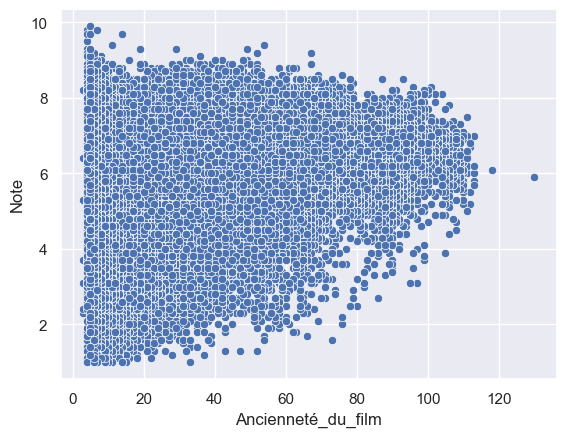

In [105]:
# distribution de la note en fonction de l'Ancienneté_du_film'
sns.scatterplot(x = "Ancienneté_du_film", y = "Note", data = imdb)

***Corrélation entre la variable note et les variable explicatives numériques***

x=imdb[["Note","Votes_USA","Votes","Durée","Note_hors_USA","Votes_hors_USA","Origines","Note_USA"]]
matrice_cor=x.corr()
matrice_cor

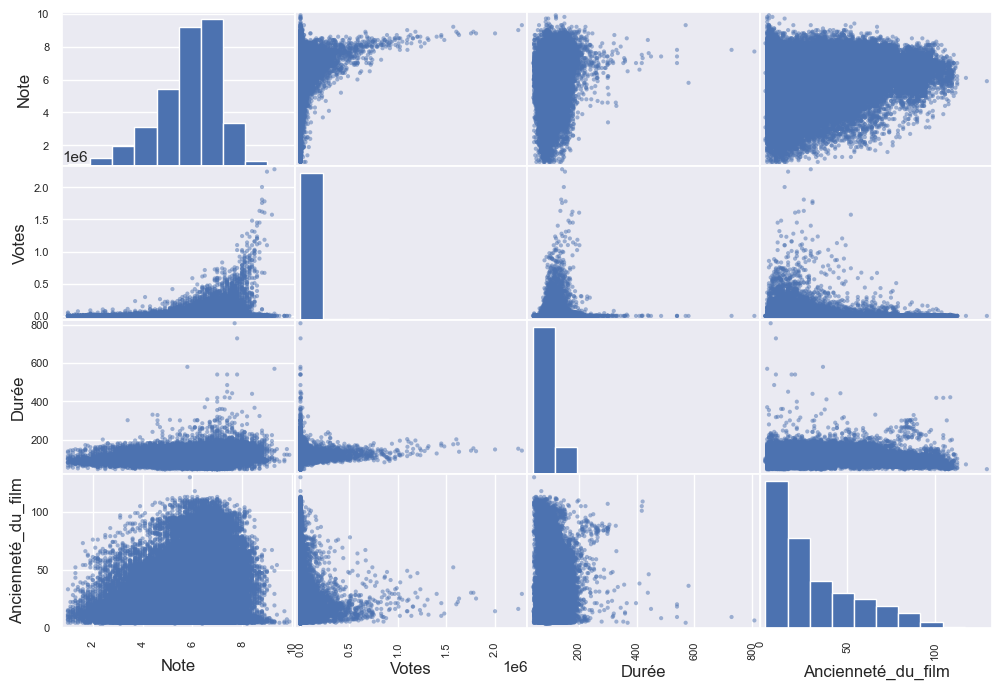

In [156]:
# analyse multivariée des variables explicatives et la cible montre que la relation n'est pas parfaitement linéaire
from pandas.plotting import scatter_matrix

attributes = ["Note", "Votes", "Durée",
              "Ancienneté_du_film"]
scatter_matrix(imdb[attributes], figsize=(12, 8))
plt.show()

In [158]:
#si on considére uniquement les notes ayant des votes >200, pour une meilleure représentativité de la note
imdb=imdb[imdb["Votes"]>200]

#si on considére uniquement les notes ayant des votes >500, on active le script  en mode code
#imdb=imdb[imdb["Votes"]>500]

#en cas de transformation des variables votes femmes , hommes, usa et  hors-usa en log pour réduire l'asymétrie présente dans ces variable
#imdb["Votes_hors_USA2"]=np.log(imdb["Votes_hors_USA"])
#imdb["Votes_hommes2"]=np.log(imdb["Votes_hommes"])
#imdb["Votes_femmes2"]=np.log(imdb["Votes_femmes"])
#imdb["Votes_USA2"]=np.log(imdb["Votes_USA"])


### Sélection les varariable à inclure dans le modele

In [160]:

X = imdb[["Durée","Genre_groupé","Origines","Langue_binaire","Votes_hommes","Votes_femmes","Votes_USA","Votes_hors_USA","Ancienneté_du_film"]]
y=imdb["Note"]



X = imdb[["Durée","Genre_groupé","Origines","Langue_binaire","Ancienneté_du_film"]]
y=imdb["Note"]


In [162]:

# entrainement avec les variables votes transformées en logarithme pour l'analyse de la sensibilité
#X = imdb[["Durée","Genre_groupé","Origines","Langue_binaire","Votes_hommes2","Votes_femmes2","Votes_USA2","Votes_hors_USA2","Ancienneté_du_film"]]
#y=imdb["Note"]


### On identifie les colonnes numériques et catégorielles.

In [164]:
# Créez une liste nommée variables_num qui ne contient que les noms de colonnes numériques du dataframe X
variables_num = list(X.select_dtypes(exclude = ['object']))
variables_num

['Durée',
 'Langue_binaire',
 'Votes_hommes',
 'Votes_femmes',
 'Votes_USA',
 'Votes_hors_USA',
 'Ancienneté_du_film']

In [165]:
# Créez une liste nommée variables_cat qui ne contient que les noms de colonnes catégorielles du dataframe X
variables_cat = list(X.select_dtypes(include = ['object']))
variables_cat

['Genre_groupé', 'Origines']

### Diviser l'échantillon

In [167]:
# On sépare temporairement les données en entraînement et en test.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 1
    )

In [168]:
# On redivise X_train pour conserver des données d'entraînement et créer un ensemble de validation
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size = 0.25, random_state = 1
    )

In [169]:
print("X_train: {0}".format(X_train.shape))
print("X_val: {0}".format(X_val.shape))
print("X_test: {0}".format(X_test.shape))

X_train: (38445, 9)
X_val: (12816, 9)
X_test: (12816, 9)


In [170]:
X_train.isna().sum()

Durée                 327
Genre_groupé          441
Origines               14
Langue_binaire        346
Votes_hommes            0
Votes_femmes            0
Votes_USA               0
Votes_hors_USA          0
Ancienneté_du_film      0
dtype: int64

X_train["Genre"].value_counts()


 Comme l'imputation des valeurs manquantes variera selon le type de variable, on sépare les variables numériques et catégorielles dans chacun des échantillons.

In [173]:
X_train_num = X_train[variables_num]
X_train_cat = X_train[variables_cat]

X_val_num = X_val[variables_num]
X_val_cat = X_val[variables_cat]

X_test_num = X_test[variables_num]
X_test_cat = X_test[variables_cat]

### Imputer les valeurs manquantes
Comme les méthodes de Scikit-Learn vont produire des arrays et que nous les retransformerons en dataframe pour améliorer la lisibilité dans les étapes intermédiaires, nous allons conserver en mémoire le nom des index de chaque ligne. Cela permettra de concatener des dataframes plus facilement (par exemple, regrouper la variable cible avec les caractéristiques correspondantes).

In [175]:
index_train = X_train.index
index_val = X_val.index
index_test = X_test.index

### Variables numériques
Pour les variables numériques, on va remplacer toutes les données manquantes par la médiane de l'échantillon d'entraînement.

In [177]:
# On trouve la médiane de chaque colonne numérique
imp_num = SimpleImputer(strategy = "median").fit(X_train_num)

# On applique la médiane à chaque valeur manquante des trois échantillons
X_train_num = imp_num.transform(X_train_num)
X_val_num = imp_num.transform(X_val_num)
X_test_num = imp_num.transform(X_test_num)

# On convertit les arrays obtenus en dataframe en reprenant les mêmes noms de colonnes
X_train_num = pd.DataFrame(X_train_num, columns = variables_num, index = index_train)
X_val_num = pd.DataFrame(X_val_num, columns = variables_num, index = index_val)
X_test_num = pd.DataFrame(X_test_num, columns = variables_num, index = index_test)

### Variables catégorielles
Pour les variables catégorielles, on va remplacer toutes les données manquantes par le mode de l'échantillon d'entraînement.

In [179]:
# Remplacez les données catégorielles manquantes
# On trouve la médiane de chaque colonne numérique
imp_cat = SimpleImputer(strategy = "most_frequent").fit(X_train_cat)

# On applique la médiane à chaque valeur manquante des trois échantillons
X_train_cat = imp_cat.transform(X_train_cat)
X_val_cat = imp_cat.transform(X_val_cat)
X_test_cat = imp_cat.transform(X_test_cat)

# On convertit les arrays obtenus en dataframe en reprenant les mêmes noms de colonnes
X_train_cat = pd.DataFrame(X_train_cat, columns = variables_cat, index = index_train)
X_val_cat = pd.DataFrame(X_val_cat, columns = variables_cat, index = index_val)
X_test_cat = pd.DataFrame(X_test_cat, columns = variables_cat, index = index_test)


On peut ensuite recombiner les variables numériques et catégorielles dans chacun des dataframes.

In [181]:
X_train = pd.concat([X_train_num, X_train_cat], axis = 1)
X_val = pd.concat([X_val_num, X_val_cat], axis = 1)
X_test = pd.concat([X_test_num, X_test_cat], axis = 1)


### Encoder les variables catégorielles
Il faut encoder les variables catégorielles sous forme de nombre entier pour que l'information puisse être utilisée dans les modèles d'apprentissage automatiqu

In [183]:
# Encodez les variables catégorielles à l'aide de ColumnTransformer
columnTransformer = ColumnTransformer(
    transformers = [('encoder', OneHotEncoder(drop = "first"), variables_cat)],
    remainder = "passthrough"
)

X_train = pd.DataFrame(
    columnTransformer.fit_transform(X_train).toarray(),
    columns = columnTransformer.get_feature_names_out(),
    index = index_train
)

X_val = pd.DataFrame(
    columnTransformer.transform(X_val).toarray(),
    columns = columnTransformer.get_feature_names_out(),
    index = index_val
)

X_test = pd.DataFrame(
    columnTransformer.transform(X_test).toarray(),
    columns = columnTransformer.get_feature_names_out(),
    index = index_test
)

In [184]:
# On conserve le nom des colonnes après l'encodage
colonnes_apres_encodage = X_train.columns

### Standardiser les variables explicatives

Les variables sont mises à l'échelle à l'aide de RobustScaler qui est moins sensible aux valeurs extrêmes.

In [186]:
# Calibration de la standardisation sur l'ensemble d'entraînement
transformer = RobustScaler().fit(X_train)

In [187]:
# Application tous les échantillons
X_train = transformer.transform(X_train)
X_val = transformer.transform(X_val)
X_test = transformer.transform(X_test)

In [188]:
# Conversion en dataframe
X_train = pd.DataFrame(X_train, columns = colonnes_apres_encodage, index = index_train)
X_val = pd.DataFrame(X_val, columns = colonnes_apres_encodage, index = index_val)
X_test = pd.DataFrame(X_test, columns = colonnes_apres_encodage, index = index_test)

#df après normalisation

X_train

In [190]:
print("X_train: {0}".format(X_train.shape))
print("X_val: {0}".format(X_val.shape))
print("X_test: {0}".format(X_test.shape))

X_train: (38445, 32)
X_val: (12816, 32)
X_test: (12816, 32)


### Sélectionner des variables moins corrélées entre elles (préparation pour le modèle 2)

In [192]:
train = pd.concat([X_train, y_train], axis = 1)

In [193]:
#corrélation entre les variables explicatives et la  variable cible note

corr_matrix = train.corr().abs()
print(corr_matrix["Note"].sort_values(ascending=False).head(30))

Note                               1.000000
remainder__Durée                   0.261719
encoder__Genre_groupé_Horror       0.255563
remainder__Langue_binaire          0.234704
remainder__Ancienneté_du_film      0.212179
encoder__Genre_groupé_Drama        0.192165
encoder__Origines_USA              0.186679
remainder__Votes_hors_USA          0.182874
remainder__Votes_USA               0.181036
remainder__Votes_hommes            0.178260
remainder__Votes_femmes            0.170369
encoder__Origines_International    0.113729
encoder__Genre_groupé_Biography    0.094452
encoder__Origines_India            0.085424
encoder__Genre_groupé_Sci-Fi       0.072895
encoder__Genre_groupé_Thriller     0.070069
encoder__Genre_groupé_Animation    0.061246
encoder__Genre_groupé_Crime        0.051560
encoder__Genre_groupé_Fantasy      0.036441
encoder__Genre_groupé_Music        0.018823
encoder__Genre_groupé_Musical      0.016359
encoder__Genre_groupé_Family       0.016167
encoder__Genre_groupé_Film-Noir 

In [344]:
# Pour faciliter la lecture, on commence par rendre nulle la diagonale de la matrice qui vaut toujours 1 sinon
for col in corr_matrix:
    corr_matrix.at[col, col] = 0

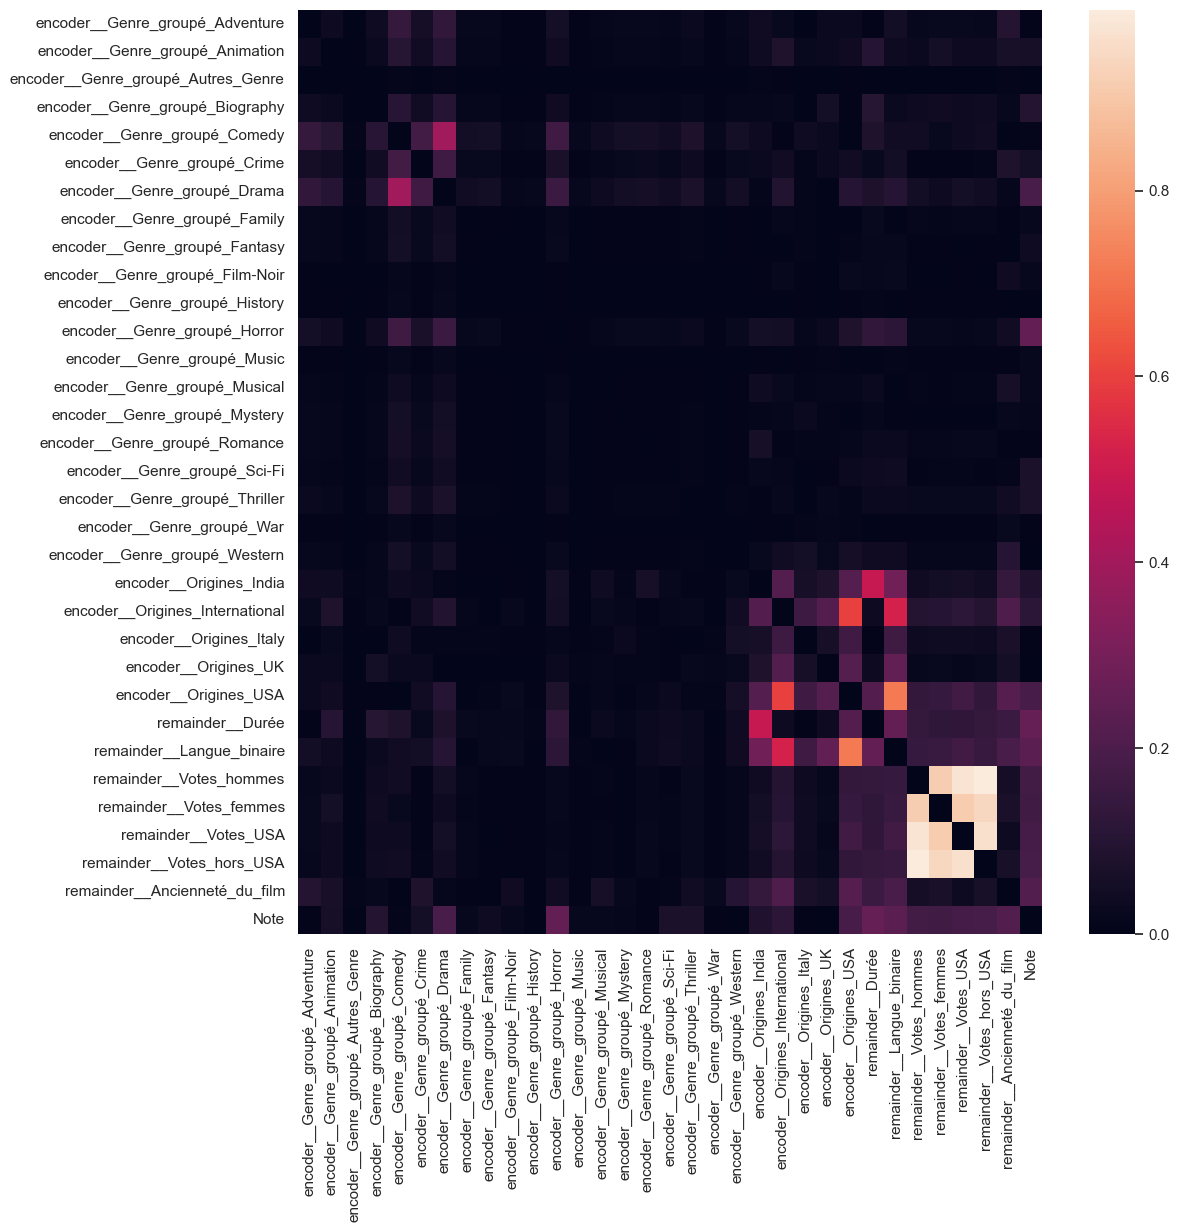

In [346]:

fig, ax = plt.subplots(figsize = (12, 12))
sns.heatmap(corr_matrix, ax = ax);

In [196]:

# On identifie les colonnes des variables explicatives avec corrélation élevée, ici le seuil est 0.6(corrélation absolue supérieure à 0.6)

colonnes_correlees = [column for column in corr_matrix.columns if any(corr_matrix[column] > 0.6)]
print('Colonnes corrélées entre elles : {}'.format((len(colonnes_correlees))))

Colonnes corrélées entre elles : 6


In [197]:
colonnes_correlees

['encoder__Origines_USA',
 'remainder__Langue_binaire',
 'remainder__Votes_hommes',
 'remainder__Votes_femmes',
 'remainder__Votes_USA',
 'remainder__Votes_hors_USA']

In [198]:
# Matrice des corrélations élevés entre des ces variables explicatives
corr_matrix2 = train[colonnes_correlees].corr().abs()
corr_matrix2

,encoder__Origines_USA,remainder__Langue_binaire,remainder__Votes_hommes,remainder__Votes_femmes,remainder__Votes_USA,remainder__Votes_hors_USA
encoder__Origines_USA,1.000000,0.717276,0.132851,0.140298,0.172294,0.130393
remainder__Langue_binaire,0.717276,1.000000,0.142302,0.150686,0.173863,0.143852
remainder__Votes_hommes,0.132851,0.142302,1.000000,0.916743,0.971532,0.994483
remainder__Votes_femmes,0.140298,0.150686,0.916743,1.000000,0.912184,0.940177
remainder__Votes_USA,0.172294,0.173863,0.971532,0.912184,1.000000,0.966065
remainder__Votes_hors_USA,0.130393,0.143852,0.994483,0.940177,0.966065,1.000000


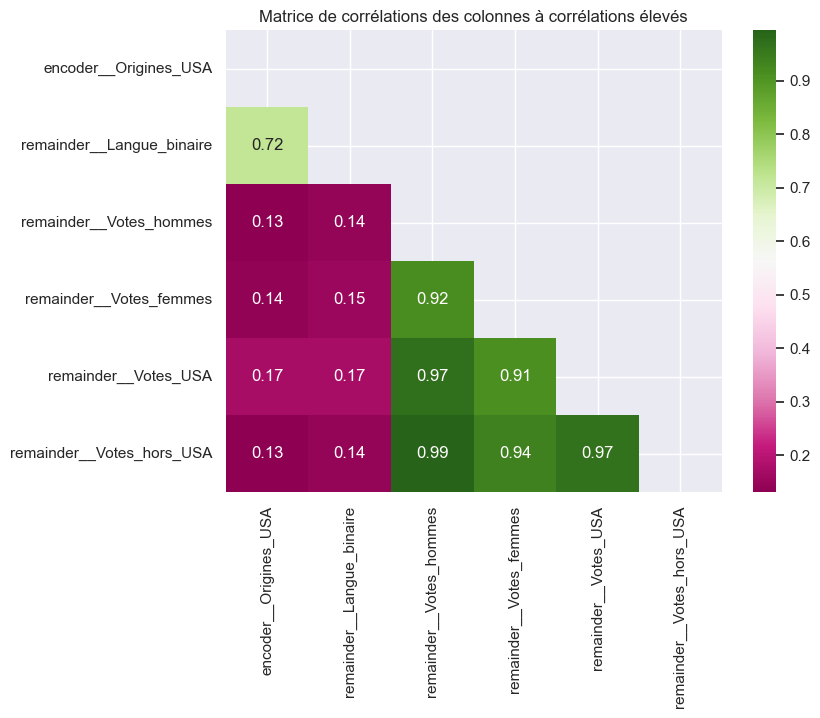

In [348]:
# présentation graphique des corrélations élevés entre ces variables explicatives

fig, ax = plt.subplots(figsize = (8, 6))

#Pour mieux visualiser les corrélation, on  montrer uniquement la partie inférieure de la matrice 
#et  masquer la partie supérieure qui lui  y est identique, vu que la matrice des corréltions est symétrique

mask = np.triu(np.ones_like(corr_matrix2, dtype=bool))

sns.heatmap(corr_matrix2, mask=mask, annot = True,cmap="PiYG", ax=ax)
ax.set_title("Matrice de corrélations des colonnes à corrélations élevés");

In [200]:
#Pour corriger la multicolinéarité entre deux variables fortement corrélés ,on retire celle qui moins corrélée avec la variable cible Note

corr_matrix3 = train[colonnes_correlees + ["Note"]].corr().abs()
print("Corrélations avec la variable Note")
print(corr_matrix3["Note"].sort_values(ascending=False))

Corrélations avec la variable Note
Note                         1.000000
remainder__Langue_binaire    0.234704
encoder__Origines_USA        0.186679
remainder__Votes_hors_USA    0.182874
remainder__Votes_USA         0.181036
remainder__Votes_hommes      0.178260
remainder__Votes_femmes      0.170369
Name: Note, dtype: float64



les variables remainder__Votes_USA, remainder__Votes_hommes, remainder__Votes_hors_USA,remainder__Votes_femmes
sont multicolinéaires, la corréaltions des ces variables avec la variable cible est approximativement similaire, de ce fait on les retires toutes.

les variable remainder__Langue_binaire et 
encoder__Origines_USA sont multicolinéaires. La variable remainder__Langue_binaire est plus corrélé avec la variable cible , on retire la variable encoder__Origines_USA.   


In [202]:
colonees_correlees_a_supprimer = [
    "encoder__Origines_USA",
    "remainder__Votes_USA",
    "remainder__Votes_hommes",
    "remainder__Votes_hors_USA",
    "remainder__Votes_femmes"    
]

Pour évaluer l’effet de la sélection des variables sur la performance du modèle final, on crée une copie des échantillons dans lesquels on retire toutes les variables indésirées. Ces échantillons serviront à entraîner le modèle 2.

In [205]:
X_train_corr = X_train.drop(colonees_correlees_a_supprimer, axis = 1)
X_val_corr = X_val.drop(colonees_correlees_a_supprimer, axis = 1)
X_test_corr = X_test.drop(colonees_correlees_a_supprimer, axis = 1)

In [206]:
# préparation des variables pour le modèle 3 : y_train_carré=y_train**2
y_train_carré = np.square(y_train)


In [207]:
y_train_carré.describe()

count    38445.000000
mean        37.567452
std         13.696197
min          1.000000
25%         28.090000
50%         38.440000
75%         47.610000
max         98.010000
Name: Note, dtype: float64

In [208]:
y_train.describe()

count    38445.000000
mean         6.005421
std          1.225730
min          1.000000
25%          5.300000
50%          6.200000
75%          6.900000
max          9.900000
Name: Note, dtype: float64

### Modèle de régression linéaire

In [210]:
linreg_1 = LinearRegression().fit(X_train, y_train)


In [211]:
linreg_2 = LinearRegression().fit(X_train_corr, y_train)


In [212]:
linreg_3 = LinearRegression().fit(X_train, y_train_carré)

### Évaluation de performance¶
On prédit la valeur de la variable cible pour différentes versions du modèle.

In [214]:
#libs pour mesurer la performance
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import  r2_score

**On prédit la valeur de variable cible pour différente version de modèle1 :**

In [216]:
y_pred_1 = linreg_1.predict(X_val)

On évalue l'erreur des prédictions :

In [218]:
erreur_model1 = mae(y_val, y_pred_1)

print("La moyenne absolue des modèle 1 est de {0}".format(erreur_model1))

La moyenne absolue des modèle 1 est de 0.76267064991485


**On prédit la valeur de variable cible pour la  version de modèle 2 :**

In [220]:
#On prédit la valeur de variable cible pour la version de modèle2 :

y_pred_2 = linreg_2.predict(X_val_corr)


#On évalue l'erreur des prédictions :

erreur_model2 = mae(y_val, y_pred_2)

print("La moyenne absolue des erreurs modèle 2 est de {0}".format(erreur_model2))

La moyenne absolue des erreurs modèle 2 est de 0.7921618261435005


***On prédit la valeur de variable cible pour la version de modèle 3 :**

In [222]:
#On prédit la valeur de variable cible pour la version de modèle 3 , on transforme la y en y**2:

y_pred_3_carré = linreg_3.predict(X_val)

#comme le but est de prédir la note, on doit transformer le carré des notes  prédit par le modèle3 en la note réelle en appliquant la racine carré
#on s'interèsse à la racine positive par défaut , vu que la note est positive

y_pred_3 = np.sqrt(y_pred_3_carré)

#On évalue l'erreur des prédictions :

erreur_model3 = mae(y_val, y_pred_3)

print("La moyenne absolue des modèle 3 est de {0}".format(erreur_model3))

La moyenne absolue des modèle 3 est de 0.7494392356990885


*Calcul des R-SQUARE pour chaque modèle

In [224]:
r2_modele1 = r2_score(y_val, y_pred_1)
r2_modele1

0.337080952432803

In [225]:
r2_modele2 = r2_score(y_val, y_pred_2)
r2_modele2

0.2881346933600728

# note réelle vs note prédite le modèle3 sur la base de  l'échantillon de validation
plt.scatter(y_val, y_pred_3, alpha=0.5)
plt.xlabel('Note réelle')
plt.ylabel('Note prédite par le modèle 3')
plt.title('Note réelle et note prédite par le modèle 3')
# doite de la note réelle si elle a été prédite parfaitement par le modèle ( note réélle = note prédite)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r')  
plt.show()

In [229]:
# Tester le modèle 3
#On prédit la valeur de variable cible pour la version de modèle 3 , on transforme la y en y**2:

y_pred_3_carré_test = linreg_3.predict(X_test)

# transformation de la note carré prédite par le modèle en la note réelle, en appliquant la racine carré

y_pred_3_test = np.sqrt(y_pred_3_carré_test)

#On évalue l'erreur des prédictions :

erreur_test_model3 = mae(y_test, y_pred_3_test)

print("La moyenne absolue des erreurs est de {0}".format(erreur_test_model3))

La moyenne absolue des erreurs est de 0.7433512823576873


In [337]:
donnees = {
    "Modèle 1": [erreur_model1, r2_modele1],
    "Modèle 2": [erreur_model2, r2_modele2],
    "Modèle 3": [erreur_model3, "na"],
    "Modèle 3 test": [erreur_test_model3, "na"]
}

df_resultats = pd.DataFrame(donnees, index = [ "MAE", "R-square"])
# Affichage standard à 4 décimales
pd.options.display.float_format = '{:.4f}'.format
df_resultats


,Modèle 1,Modèle 2,Modèle 3,Modèle 3 test
MAE,0.7627,0.7922,0.7494,0.7434
R-square,0.3371,0.2881,na,na


In [354]:
# Détail des notes prédites sur l'échantillon test
resultats = pd.DataFrame({"Vraie note": y_test, "Note prédite": y_pred_3_test})
resultats['Différence relative'] = (resultats["Note prédite"] - resultats["Vraie note"]) / resultats["Vraie note"]

# Affichage standard à 2 décimales
pd.options.display.float_format = '{:.2f}'.format
resultats.describe()

,Vraie note,Note prédite,Différence relative
count,12816.00,12816.00,12816.00
mean,5.99,6.09,0.06
std,1.23,0.67,0.31
min,1.00,3.42,-0.50
25%,5.30,5.70,-0.08
50%,6.20,6.16,-0.01
75%,6.80,6.52,0.11
max,9.70,11.56,5.05


In [234]:
resultats[(resultats["Note prédite"]>10)]["Note prédite"].count()

1

<Axes: xlabel='Vraie note', ylabel='Note prédite'>

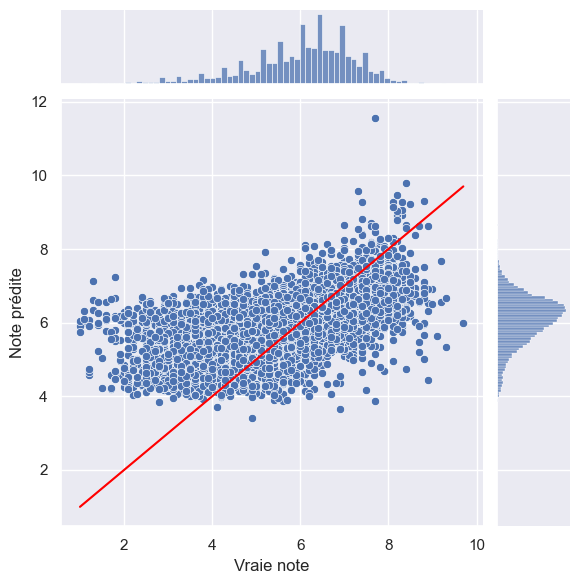

In [341]:
sns.jointplot(x = "Vraie note", y = "Note prédite", data = resultats)
sns.lineplot(x = "Vraie note", y = "Vraie note",color= "red",data = resultats)
#sns.lineplot(x = "Différence relative", y = "Différence relative",color= "green",data = resultats)
# chaque point représente un film dans l'échantillon test, définit par sa note actuelle ou réelle et  la note prédite par le modèle 3
# les notes prochent de la droite rouge ont été bien prédit par le modèle 3 

In [236]:
resultats.sort_values("Différence relative", ascending = False)

,Vraie note,Note prédite,Différence relative
80736,1.00,6.05,5.05
74956,1.00,5.92,4.92
75022,1.10,6.33,4.75
82053,1.00,5.74,4.74
41627,1.10,6.10,4.55
...,...,...,...
83732,8.40,4.74,-0.44
78598,7.50,4.17,-0.44
77213,6.90,3.65,-0.47
51973,7.70,3.87,-0.50


In [237]:
# constante estimée du modèle3
print("Ordonnée à l'origine:", np.round(linreg_3.intercept_, 4))

Ordonnée à l'origine: 25.9612


In [239]:
#coefficients estimés du modèle3
print("Coefficients:", linreg_3.coef_)

Coefficients: [ 2.74493738e+00  1.18758457e+01  9.96816741e+00  1.09806493e+01
  4.51565493e+00  6.59578105e+00  8.15178146e+00  2.54156749e+00
 -9.46354185e-03  1.12024054e+01  3.55226251e+00 -4.65557840e+00
  1.86556998e+01  3.15936891e+00  2.36331282e+00  4.05419267e+00
 -5.70586645e+00  2.84393971e-02  4.86377559e+00  3.39082041e+00
  1.40156888e+00  2.23046677e+00 -2.55561233e+00  3.02098478e+00
  5.88889684e-02  2.76083435e+00 -6.35322655e+00 -4.78174396e-01
 -8.16803487e-02  1.99519248e-01  5.87504332e-01  5.62779264e+00]


In [240]:
#coefficients estimés du modèle en format df
beta =pd.DataFrame(np.round(linreg_3.coef_,2), index = colonnes_apres_encodage)
beta.sort_values(0,ascending = False)

,0
encoder__Genre_groupé_Music,18.66
encoder__Genre_groupé_Animation,11.88
encoder__Genre_groupé_Film-Noir,11.20
encoder__Genre_groupé_Biography,10.98
encoder__Genre_groupé_Autres_Genre,9.97
encoder__Genre_groupé_Drama,8.15
encoder__Genre_groupé_Crime,6.60
remainder__Ancienneté_du_film,5.63
encoder__Genre_groupé_War,4.86
encoder__Genre_groupé_Comedy,4.52


La transformation de la variable dans le modèle 3 (y² = x) doit être prise en considération pour vérifier les conditions de validité en cas d'inférence statistique, notamment pour l'interprétation des paramètres et la distribution des erreurs. Une autre méthode simple consiste à utiliser directement un modèle linéaire généralisé (GLM) pour prendre en compte l'asymétrie des variables, en utilisant une fonction de lien. 

In [329]:
#modèle linéaire généralisé adapté à l'asymetrie des variables y et les Xi

from sklearn.linear_model import TweedieRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Modele 4 : GLM avec une fonction de lien log (distribution Tweedie, )
glm = TweedieRegressor(power=2, alpha=0.0,max_iter=1000, link='log')  # power=1.5 ~ entre Poisson et Gamma,puissance=2 ou Gamma, power=1 poisson
glm.fit(X_train, y_train)

# Prédiction
y_pred_glm = glm.predict(X_val)

# Clip pour rester dans [1, 10]
y_pred_glm = y_pred_glm.clip(1, 10)

# Évaluation
mae_glm = mean_absolute_error(y_val, y_pred_glm)
#r2_glm = r2_score(y_val, y_pred_glm)




print(f"MAE GLM: {mae_glm:.3f}")
#print(f"R² GLM: {r2_glm:.3f}")

MAE GLM: 0.771


In [331]:

# Prédiction sur l'échantillon test
y_test_pred_glm = glm.predict(X_test)

# Clip pour rester dans [1, 10]
y_test_pred_glm = y_test_pred_glm.clip(1, 10)

# Évaluation
mae_glm_test = mean_absolute_error(y_test, y_test_pred_glm)
#r2_glm = r2_score(y_val, y_pred_glm)




print(f"MAE GLM Test: {mae_glm_test:.3f}")
#print(f"R² GLM: {r2_glm:.3f}")

MAE GLM Test: 0.763


In [244]:
# modèle de regression par réseau de neurones( deux couches cachées: 64 neurones, 32 neuronnes, 1 neurone de sortie et activation relu)
# les réseaux de neurones permettent de capter la relation non linéaire
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Modele 5 : Réseau de neurones simple
mlp = MLPRegressor(hidden_layer_sizes=(64, 32), max_iter=500, random_state=42, early_stopping=True)
mlp.fit(X_train, y_train)

# Prédiction
y_pred_mlp = mlp.predict(X_val)
# Clip pour rester dans l'intervalle valide
y_pred_mlp = y_pred_mlp.clip(1, 10)

# Évaluation
mae_mlp = mean_absolute_error(y_val, y_pred_mlp)
r2_mlp = r2_score(y_val, y_pred_mlp)

print(f"MAE MLP: {mae_mlp:.3f}")
print(f"R² MLP: {r2_mlp:.3f}")

MAE MLP: 0.653
R² MLP: 0.481


In [245]:
# Prédiction
y_test_pred_mlp = mlp.predict(X_test)
# Clip pour rester dans l'intervalle valide
y_test_pred_mlp = y_test_pred_mlp.clip(1, 10)

# Évaluation
mae_mlp_test = mean_absolute_error(y_test, y_test_pred_mlp)


print(f"MAE MLP Test: {mae_mlp_test:.3f}")


MAE MLP Test: 0.653


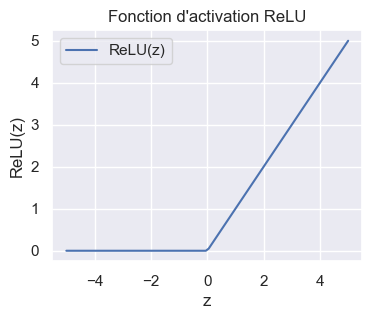

In [246]:
import numpy as np
import matplotlib.pyplot as plt

z = np.linspace(-5, 5, 100)
relu = np.maximum(0, z)

plt.figure(figsize=(4,3))
plt.plot(z, relu, label='ReLU(z)')
plt.xlabel('z')
plt.ylabel('ReLU(z)')
plt.title('Fonction d\'activation ReLU')
plt.grid(True)
plt.legend()
plt.show()

In [247]:
# Extraction des poids et biais( Dernière époque)
weights = mlp.coefs_      # Liste des matrices de poids entre chaque couche
biases = mlp.intercepts_  # Liste des vecteurs de biais pour chaque couche

# Affichage des rangs des matrices (entrants, sortant) des poinds
for i, (w, b) in enumerate(zip(weights, biases)):
    print(f"Couche {i+1}: poids shape={w.shape}, biais shape={b.shape}")

Couche 1: poids shape=(32, 64), biais shape=(64,)
Couche 2: poids shape=(64, 32), biais shape=(32,)
Couche 3: poids shape=(32, 1), biais shape=(1,)


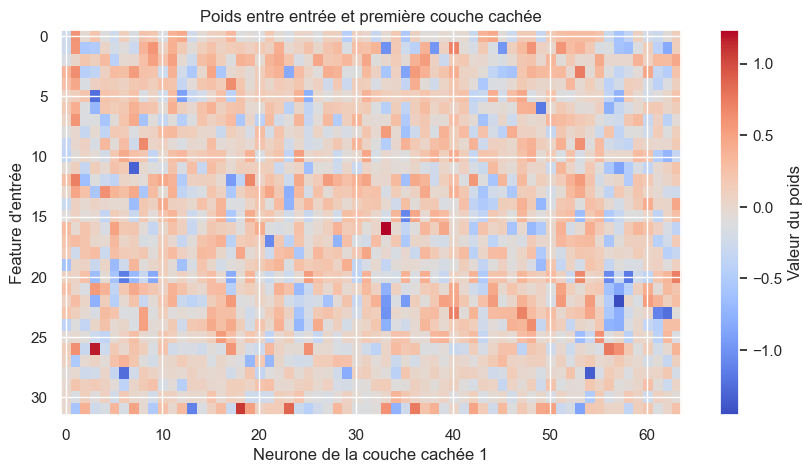

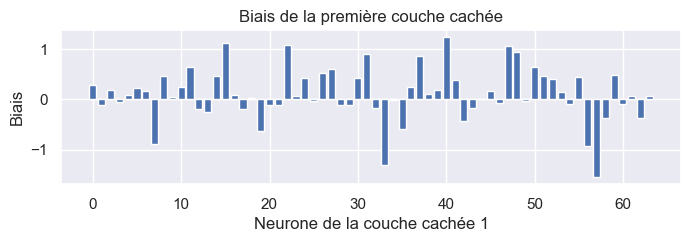

In [248]:
# Visualisation des poids de la première couche (entrée -> couche cachée 1)
plt.figure(figsize=(10, 5))
plt.imshow(weights[0], aspect='auto', cmap='coolwarm')
plt.colorbar(label='Valeur du poids')
plt.xlabel('Neurone de la couche cachée 1')
plt.ylabel('Feature d\'entrée')
plt.title('Poids entre entrée et première couche cachée')
plt.show()

# Visualisation des biais de la première couche cachée
plt.figure(figsize=(8, 2))
plt.bar(range(len(biases[0])), biases[0])
plt.xlabel('Neurone de la couche cachée 1')
plt.ylabel('Biais')
plt.title('Biais de la première couche cachée')
plt.show()

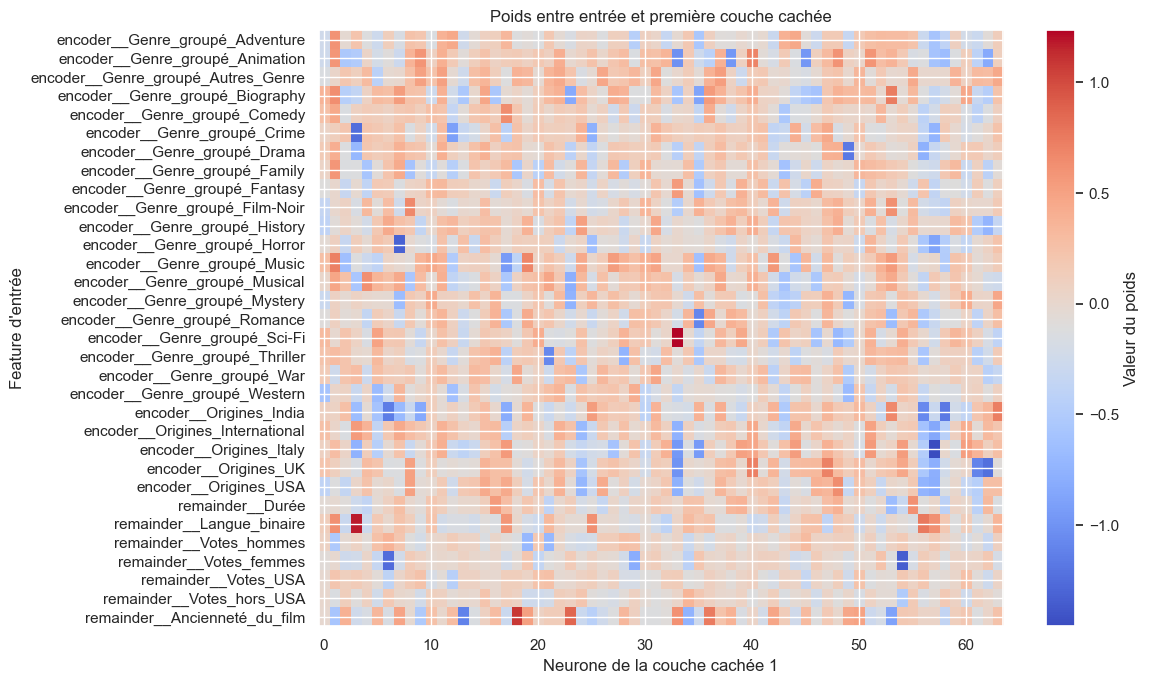

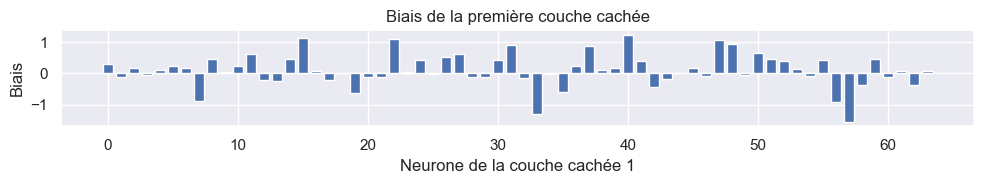

In [249]:
feature_names = X_train.columns  # ou une liste de noms, selon ton contexte

# Visualisation des poids de la première couche (entrée -> couche cachée 1)
plt.figure(figsize=(12, 7))
plt.imshow(weights[0], aspect='auto', cmap='coolwarm')
plt.colorbar(label='Valeur du poids')
plt.xlabel('Neurone de la couche cachée 1')
plt.ylabel('Feature d\'entrée')
plt.title('Poids entre entrée et première couche cachée')

# Ajout des noms de features
plt.yticks(np.arange(len(feature_names)), feature_names)

plt.tight_layout()
plt.show()

# Visualisation des biais de la première couche cachée
plt.figure(figsize=(10, 2))
plt.bar(range(len(biases[0])), biases[0])
plt.xlabel('Neurone de la couche cachée 1')
plt.ylabel('Biais')
plt.title('Biais de la première couche cachée')
plt.tight_layout()
plt.show()

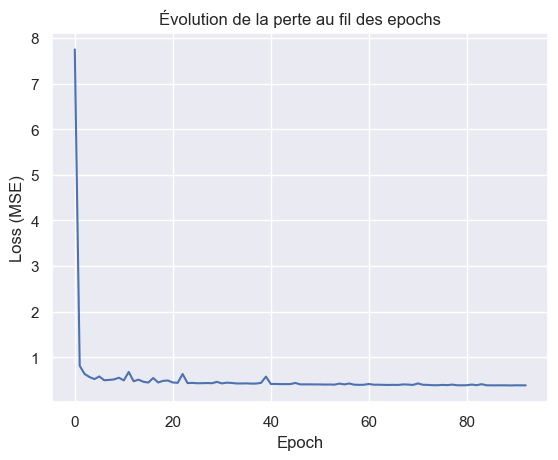

In [250]:
plt.plot(mlp.loss_curve_)
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Évolution de la perte au fil des epochs')
plt.grid(True)
plt.show()

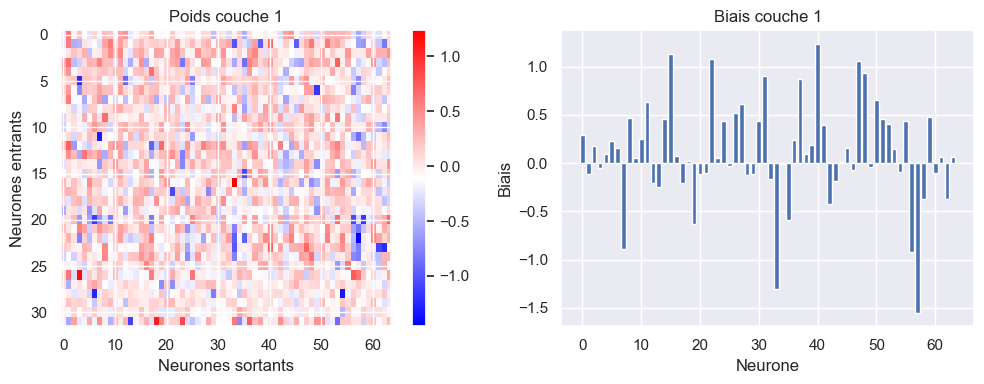

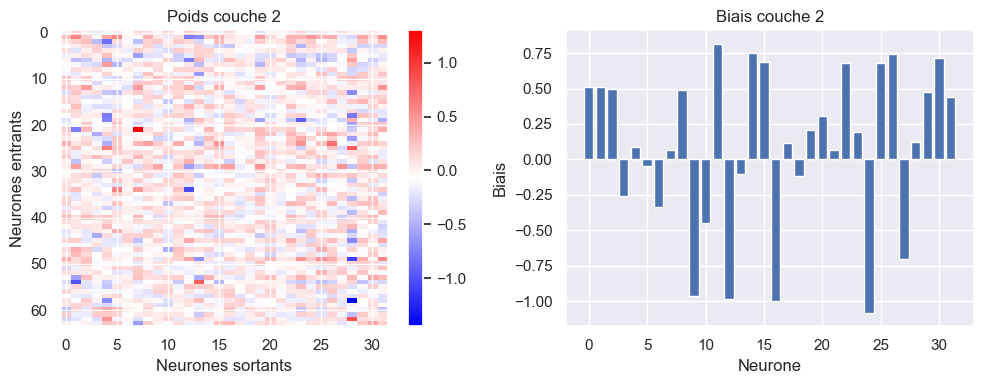

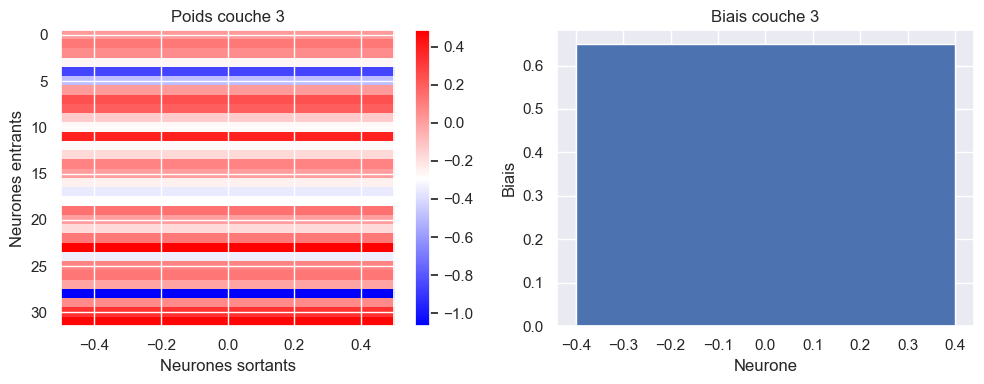

In [251]:
for i, (w, b) in enumerate(zip(weights, biases)):
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.imshow(w, aspect='auto', cmap='bwr')
    plt.colorbar()
    plt.title(f'Poids couche {i+1}')
    plt.xlabel('Neurones sortants')
    plt.ylabel('Neurones entrants')
    plt.subplot(1,2,2)
    plt.bar(range(len(b)), b)
    plt.title(f'Biais couche {i+1}')
    plt.xlabel('Neurone')
    plt.ylabel('Biais')
    plt.tight_layout()
    plt.show()

In [ ]:
#la couche 3 est constutuée par un seul neurone sortant 

In [252]:
print(f"Nombre d'epochs effectuées : {len(mlp.loss_curve_)}")
print(f"Erreur d'ajustement(fonction de perte) à la dernière epoch : {mlp.loss_curve_[-1]}")

Nombre d'epochs effectuées : 93
Erreur d'ajustement(fonction de perte) à la dernière epoch : 0.38300012497445063


In [253]:
# Méthode de random forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Modèle 6 : Random Forest pour la régression
rf = RandomForestRegressor(n_estimators=100, max_depth=12, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

# Prédiction
y_pred_rf = rf.predict(X_val)
y_pred_rf = y_pred_rf.clip(1, 10)  # Pour rester dans l'intervalle valide

# Évaluation
mae_rf = mean_absolute_error(y_val, y_pred_rf)
r2_rf = r2_score(y_val, y_pred_rf)
print(f"MAE Random Forest: {mae_rf:.3f}")
print(f"R² Random Forest: {r2_rf:.3f}")

MAE Random Forest: 0.653
R² Random Forest: 0.482


le modéle qui donne la meilleure  performante en terme de MAE, évaluée sur l'échantillon de validation,est  le modèle RN , avec le modéle RF